**Predictive Modeling for Insurance Claim Patterns in Car Insurance Policies: A Data-driven Approach for Operational Optimization**



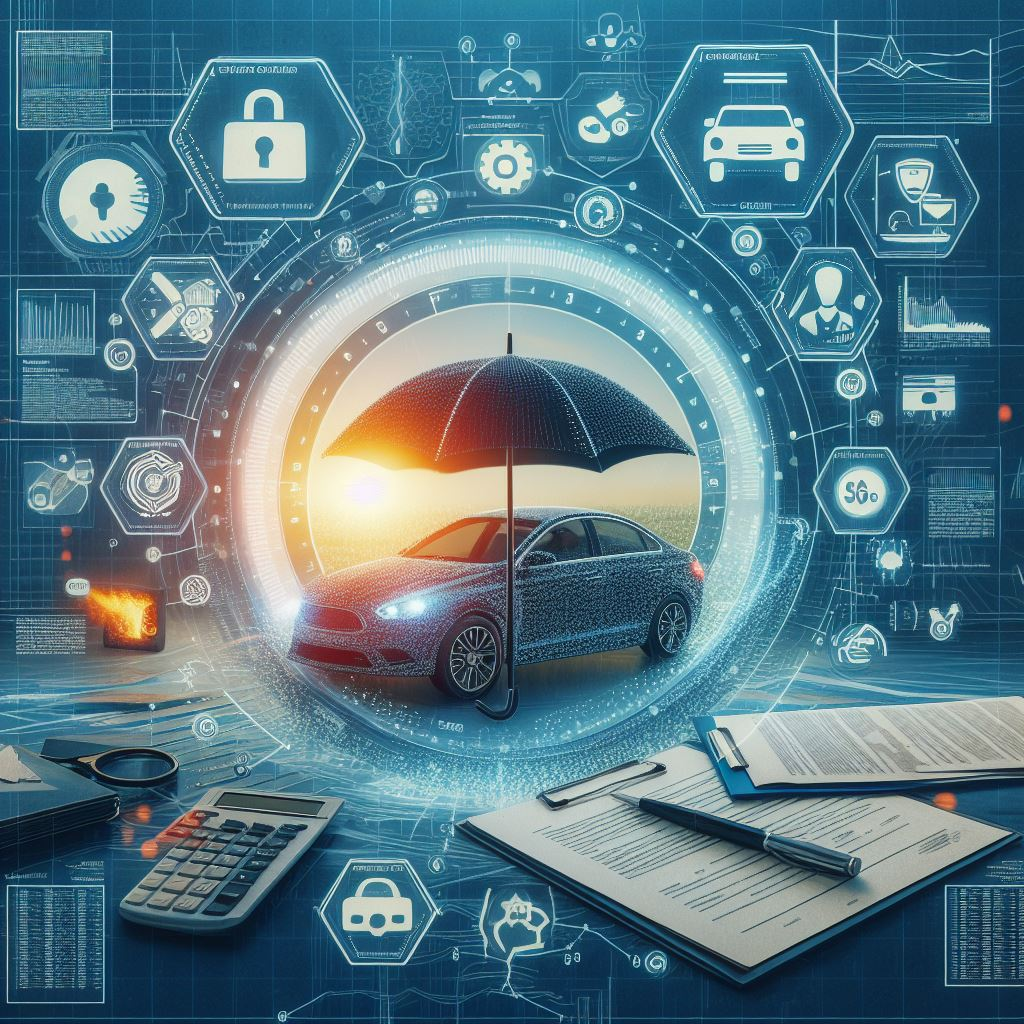


**Problem Statement**:
To analyze the factors influencing insurance claim occurrences in the context of car insurance policies. The objective is to identify key features and patterns within the dataset that contribute to the likelihood of a claim being made. By understanding these factors, insurance companies can implement targeted risk mitigation strategies, improve pricing models, and enhance customer engagement to optimize their operations and reduce claim losses.

**Data Dictionary**

1. `policy_id`: Unique identifier for each insurance policy.
2. `policy_tenure`: Duration of the insurance policy tenure in years.
3. `age_of_car`: Age of the insured car in years.
4. `age_of_policyholder`: Age of the policyholder in years.
5. `area_cluster`: Categorization of the geographical area where the insured car is primarily located.
6. `population_density`: Population density of the area where the insured car is primarily located.
7. `make`: Manufacturer or brand of the insured car.
8. `segment`: Classification of the car based on its features and specifications.
9. `model`: Model name or number of the insured car.
10. `fuel_type`: Type of fuel used by the insured car (e.g., petrol, diesel, CNG).
11. `max_torque`: Maximum torque produced by the car's engine.
12. `max_power`: Maximum power output of the car's engine.
13. `engine_type`: Type of engine installed in the car (e.g., petrol, diesel).
14. `airbags`: Number of airbags installed in the car.
15. `is_esc`: Indicator for the presence of Electronic Stability Control (ESC) in the car.
16. `is_adjustable_steering`: Indicator for the presence of adjustable steering in the car.
17. `is_tpms`: Indicator for the presence of Tire Pressure Monitoring System (TPMS) in the car.
18. `is_parking_sensors`: Indicator for the presence of parking sensors in the car.
19. `is_parking_camera`: Indicator for the presence of a parking camera in the car.
20. `rear_brakes_type`: Type of rear brakes installed in the car.
21. `displacement`: Engine displacement volume in cubic centimeters (cc).
22. `cylinder`: Number of cylinders in the car's engine.
23. `transmission_type`: Type of transmission system used in the car (e.g., manual, automatic).
24. `gear_box`: Number of gears in the car's transmission system.
25. `steering_type`: Type of steering mechanism used in the car.
26. `turning_radius`: Turning radius of the car in meters.
27. `length`: Length of the car in millimeters.
28. `width`: Width of the car in millimeters.
29. `height`: Height of the car in millimeters.
30. `gross_weight`: Gross weight of the car in kilograms.
31. `is_front_fog_lights`: Indicator for the presence of front fog lights in the car.
32. `is_rear_window_wiper`: Indicator for the presence of a rear window wiper in the car.
33. `is_rear_window_washer`: Indicator for the presence of a rear window washer in the car.
34. `is_rear_window_defogger`: Indicator for the presence of a rear window defogger in the car.
35. `is_brake_assist`: Indicator for the presence of brake assist system in the car.
36. `is_power_door_locks`: Indicator for the presence of power door locks in the car.
37. `is_central_locking`: Indicator for the presence of central locking system in the car.
38. `is_power_steering`: Indicator for the presence of power steering in the car.
39. `is_driver_seat_height_adjustable`: Indicator for the presence of adjustable driver seat height in the car.
40. `is_day_night_rear_view_mirror`: Indicator for the presence of a day-night rearview mirror in the car.
41. `is_ecw`: Indicator for the presence of Electronic Child Watch (ECW) system in the car.
42. `is_speed_alert`: Indicator for the presence of speed alert system in the car.
43. `ncap_rating`: Safety rating of the car as per National Car Assessment Program (NCAP).
44. `is_claim`: Binary indicator for whether a claim was made for the insurance policy (0 = No claim, 1 = Claim made).



In [ ]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the numpy library for numerical operations
import numpy as np

# Importing the matplotlib library for data visualization
import matplotlib.pyplot as plt

# Importing the seaborn library for advanced data visualization
import seaborn as sns

# Importing the warnings library to handle warnings
import warnings

# Suppressing potential warnings for cleaner output
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
path="/content/drive/MyDrive/Datasets/train.csv"
df=pd.read_csv(path)

In [ ]:
# Set display option to show all columns without truncating
pd.set_option('display.max_columns', None)

In [ ]:
# Displaying the first few rows of the DataFrame 'df'
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
# Displaying the last few rows of the DataFrame 'df'
print("\nLast few rows of the DataFrame:")
df.tail()


Last few rows of the DataFrame:


,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58591,ID58592,0.124429,0.02,0.442308,C8,8794,3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,6,Power,5.2,4300,1790,1635,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0


In [ ]:
# Displaying the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(58592, 44)


In [ ]:
# Displaying information about the DataFrame
print("\nInformation about the DataFrame:")
df.info()


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                        

In [ ]:
# Checking for null values
df.isnull().sum()


policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

No null values found in the dataset

In [ ]:
# Descriptive statistics for numerical columns using the describe() method
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [ ]:
# Descriptive statistics for categorical columns (object type) using the describe() method
df.describe(include='object').T

,count,unique,top,freq
policy_id,58592,58592,ID00001,1
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526


**Summary**

1. **Numerical Columns:**
   - **Policy Tenure:** The average policy tenure is approximately 0.61 years, with a standard deviation of 0.41 years. The minimum tenure is around 0.0027 years, while the maximum is about 1.40 years.
   - **Age of Car:** The average age of cars insured is approximately 0.07 years, with a standard deviation of 0.056 years. The oldest car in the dataset is 1 year old, and the newest is brand new.
   - **Age of Policyholder:** The average age of policyholders is approximately 0.47 years, with a standard deviation of 0.12 years. The youngest policyholder is around 0.29 years old, and the oldest is 1 year old.
   - **Population Density:** The dataset covers areas with varying population densities, ranging from 290 to 73,430 people per area.
   - **Make:** The dataset includes cars from various manufacturers (make), with the most frequent make being represented 1.76 times on average.
   - **Airbags:** The number of airbags ranges from 1 to 6, with an average count of approximately 3.14 airbags per car.
   - **Displacement:** Engine displacement varies widely, with values ranging from 796 to 1,498 cubic centimeters (cc).
   - **Gross Weight:** The gross weight of cars in the dataset ranges from 1,051 to 1,720 kilograms.



2. **Categorical Columns:**
   - **Area Cluster:** The dataset includes cars from 22 different area clusters, with cluster C8 being the most frequent.
   - **Segment:** Cars are categorized into 6 segments, with segment M1 being the most frequent.
   - **Model:** There are 11 different car models in the dataset, with model M1 being the most frequent.
   - **Fuel Type:** Cars in the dataset primarily use petrol as fuel, followed by diesel and CNG.
   - **Engine Type:** The majority of cars have an F8D Petrol Engine.
   - **ESC (Electronic Stability Control):** Most cars in the dataset do not have ESC.
   - **Adjustable Steering:** The majority of cars have adjustable steering.
   - **TPMS (Tire Pressure Monitoring System):** Most cars in the dataset do not have TPMS.
   - **Parking Sensors:** The majority of cars in the dataset have parking sensors.
   - **Parking Camera:** Most cars do not have a parking camera.
   - **Transmission Type:** Manual transmission is more common than automatic.
   - **Steering Type:** Power steering is the most common type.
   - **Front Fog Lights:** Most cars have front fog lights.
   - **Rear Window Wiper:** The majority of cars do not have a rear window wiper.
   - **Brake Assist:** Brake assist is present in many cars.
   - **Power Door Locks:** Most cars have power door locks.
   - **Central Locking:** Central locking is present in most cars.
   - **Power Steering:** Power steering is present in the majority of cars.
   - **Driver Seat Height Adjustable:** Many cars have adjustable driver seat height.
   - **Day-Night Rear View Mirror:** Most cars do not have a day-night rearview mirror.
   - **ECW (Electronic Child Watch):** ECW is present in many cars.
   - **Speed Alert:** Speed alert is present in some cars.


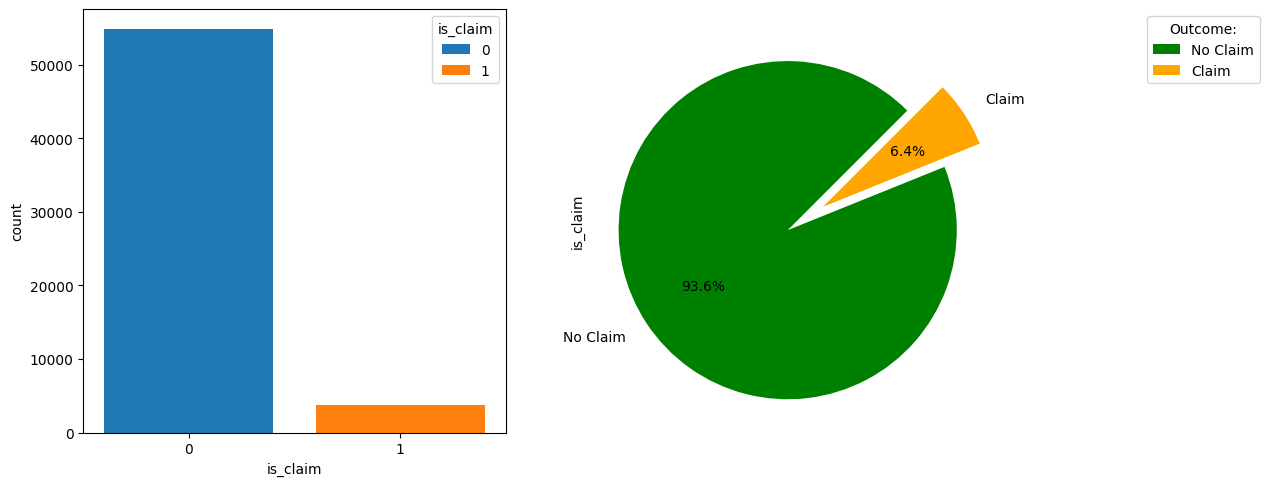

In [ ]:
# Create a figure with two subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5.5))

# Plot a count plot (bar plot) of the target class 'is_claim' on the first subplot (ax1)
sns.countplot(x=df['is_claim'], data=df, saturation=1, hue='is_claim', ax=ax1)

# Plot a pie chart of the target class 'is_claim' on the second subplot (ax2)
# Set colors for the pie chart slices
colors = ['green', 'orange']
# Specify the extent to which each slice should be exploded from the center
explode = [0.1, 0.15]
# Specify labels for the pie chart slices
labels = ['No Claim', 'Claim']
# Plot the pie chart with percentages formatted to one decimal place
df['is_claim'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=45,
                                    colors=colors, explode=explode, labels=labels, labeldistance=1.15)
# Add a legend to the pie chart
ax2.legend(title='Outcome:', loc='upper right', bbox_to_anchor=(1.6, 1))

# Display the plot
plt.show()


This indicates that approximately 93.60% of the instances in the dataset correspond to cases where no insurance claim was made, while around 6.40% of the instances correspond to cases where a claim was made.

In [ ]:
# Dropping Policy_ID column as it is a unique identifier
df.drop(['policy_id'], axis=1, inplace=True)

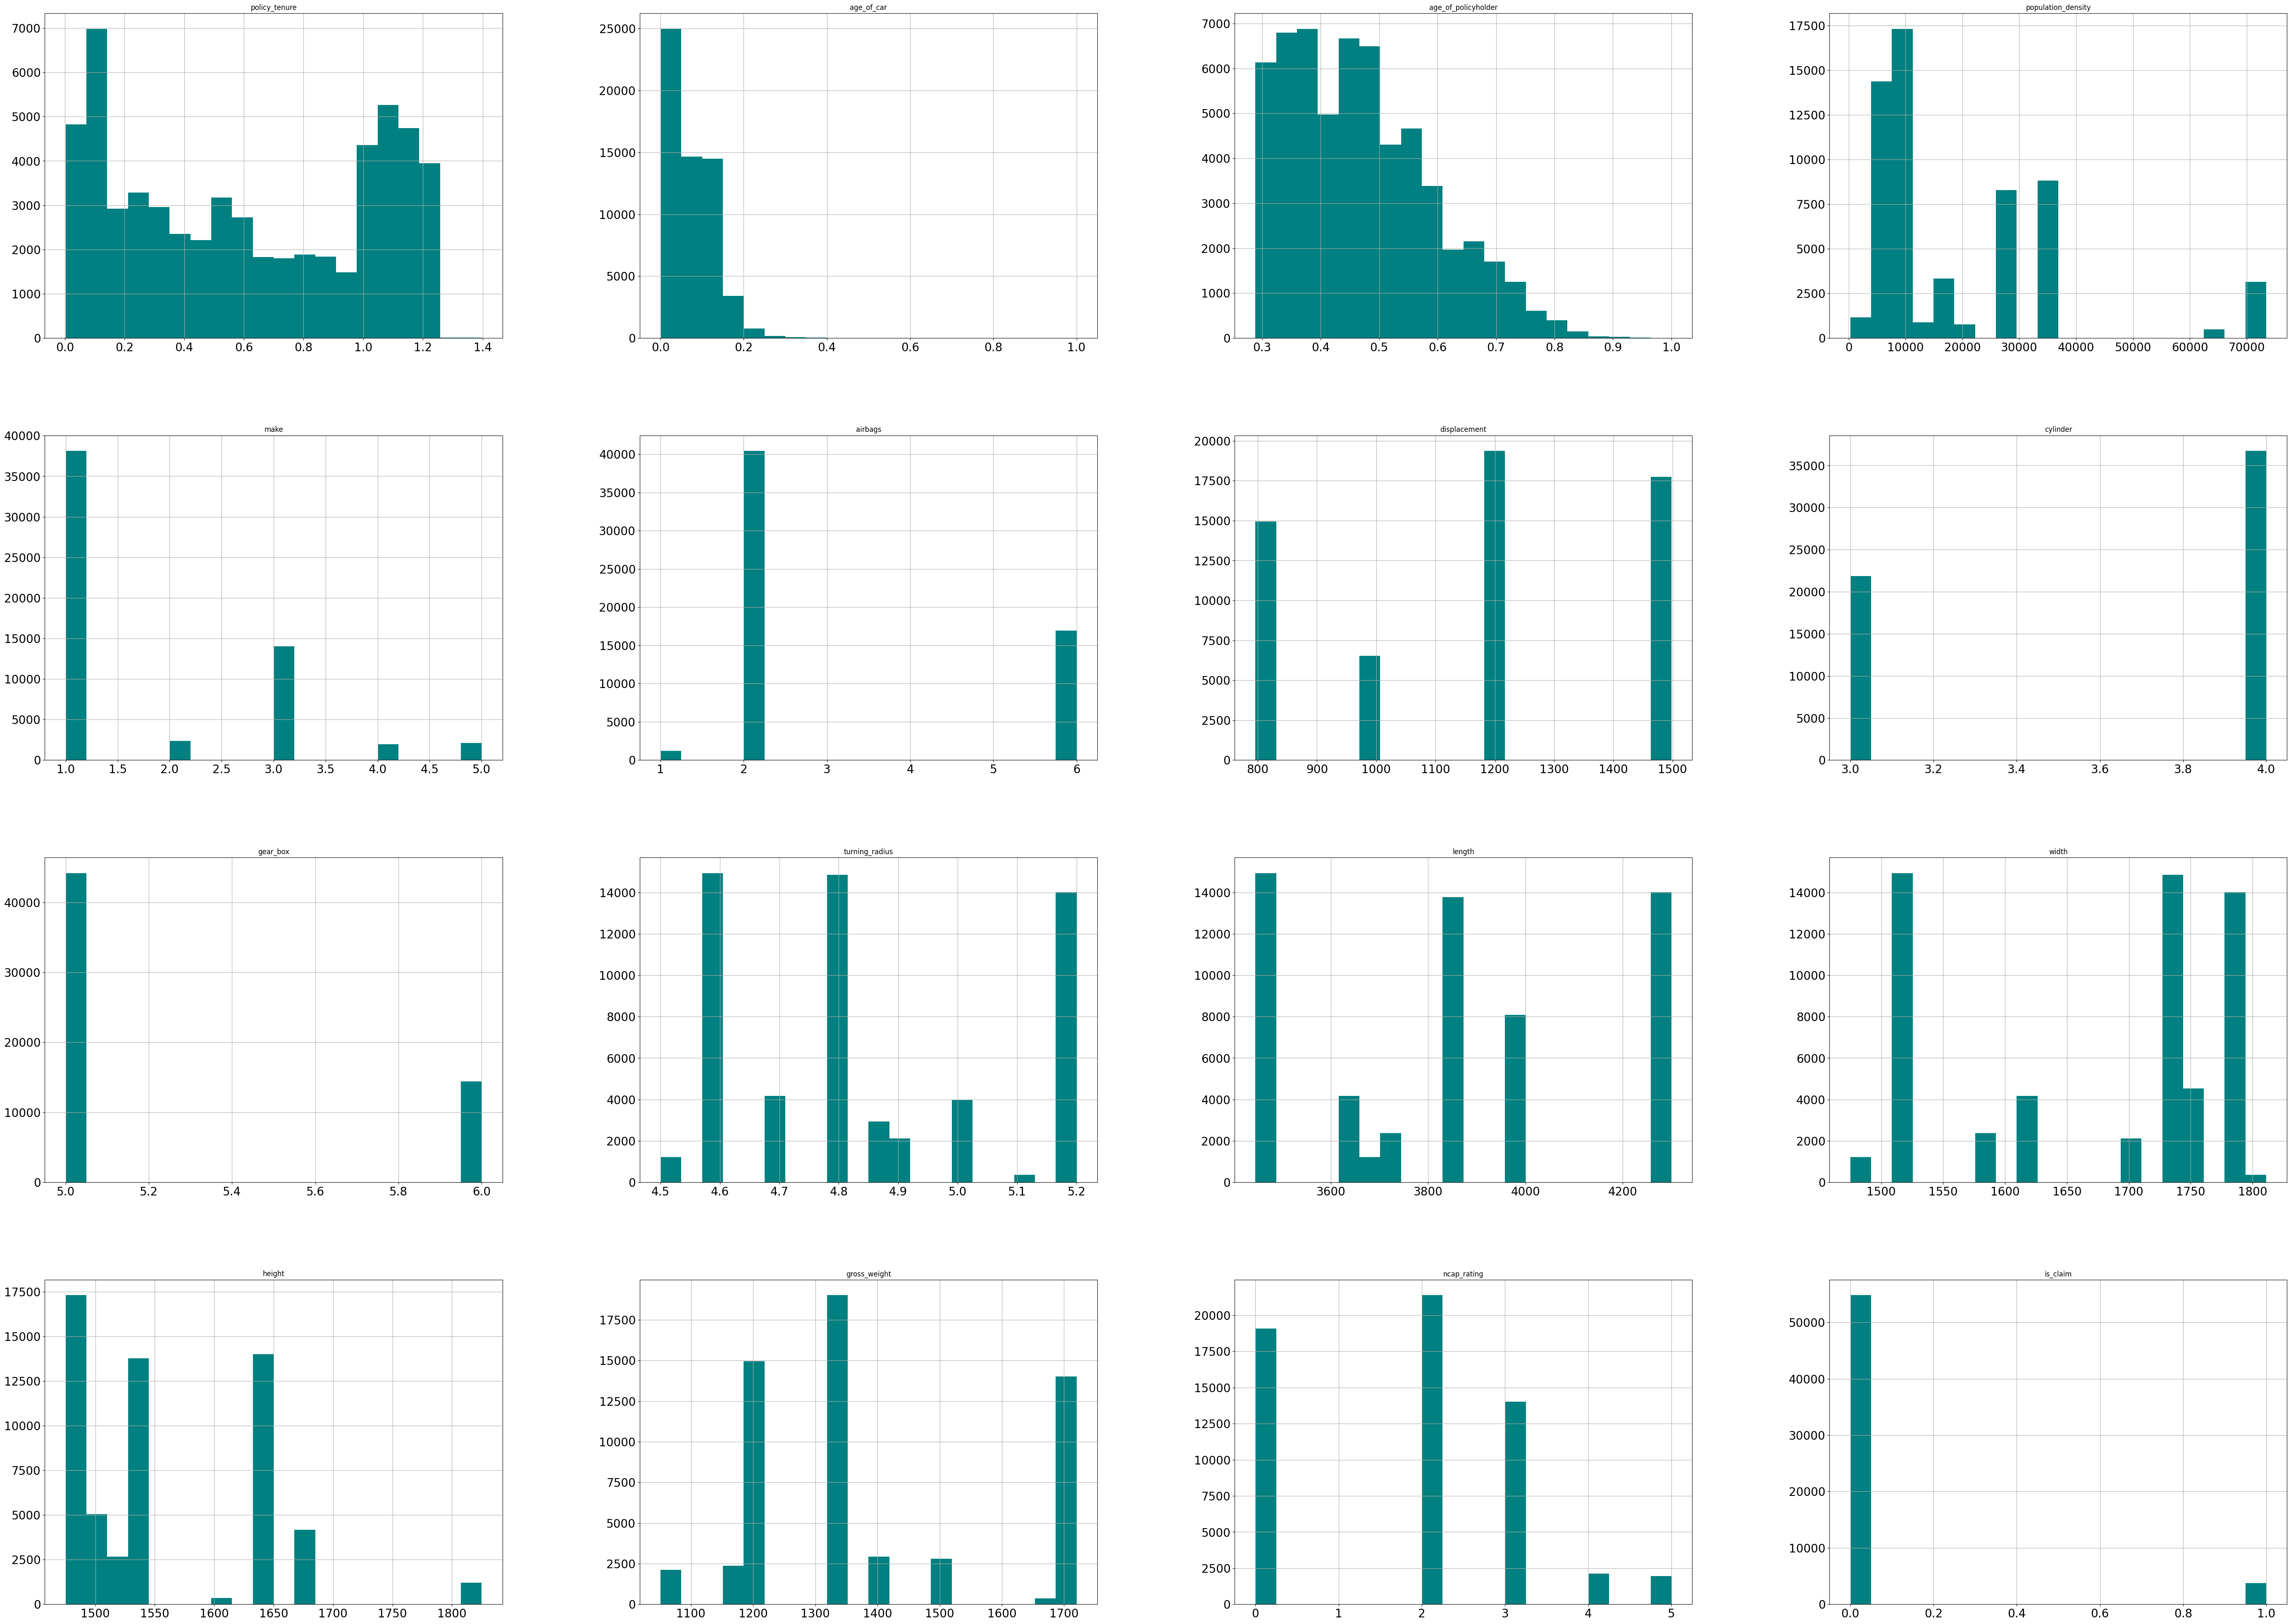

In [ ]:
# Plotting histograms for all numerical columns in the DataFrame 'df'
# Setting the size of x-axis labels to 20
# Setting the size of y-axis labels to 20
# Dividing the data into 20 bins for each histogram
# Setting the size of the figure to (70, 50) inches to accommodate multiple histograms
# Setting the color of the histogram bars to a light beige color
df.hist(xlabelsize=20, ylabelsize=20, bins=20, figsize=(70,50), color='teal')

# Displaying the histograms
plt.show()


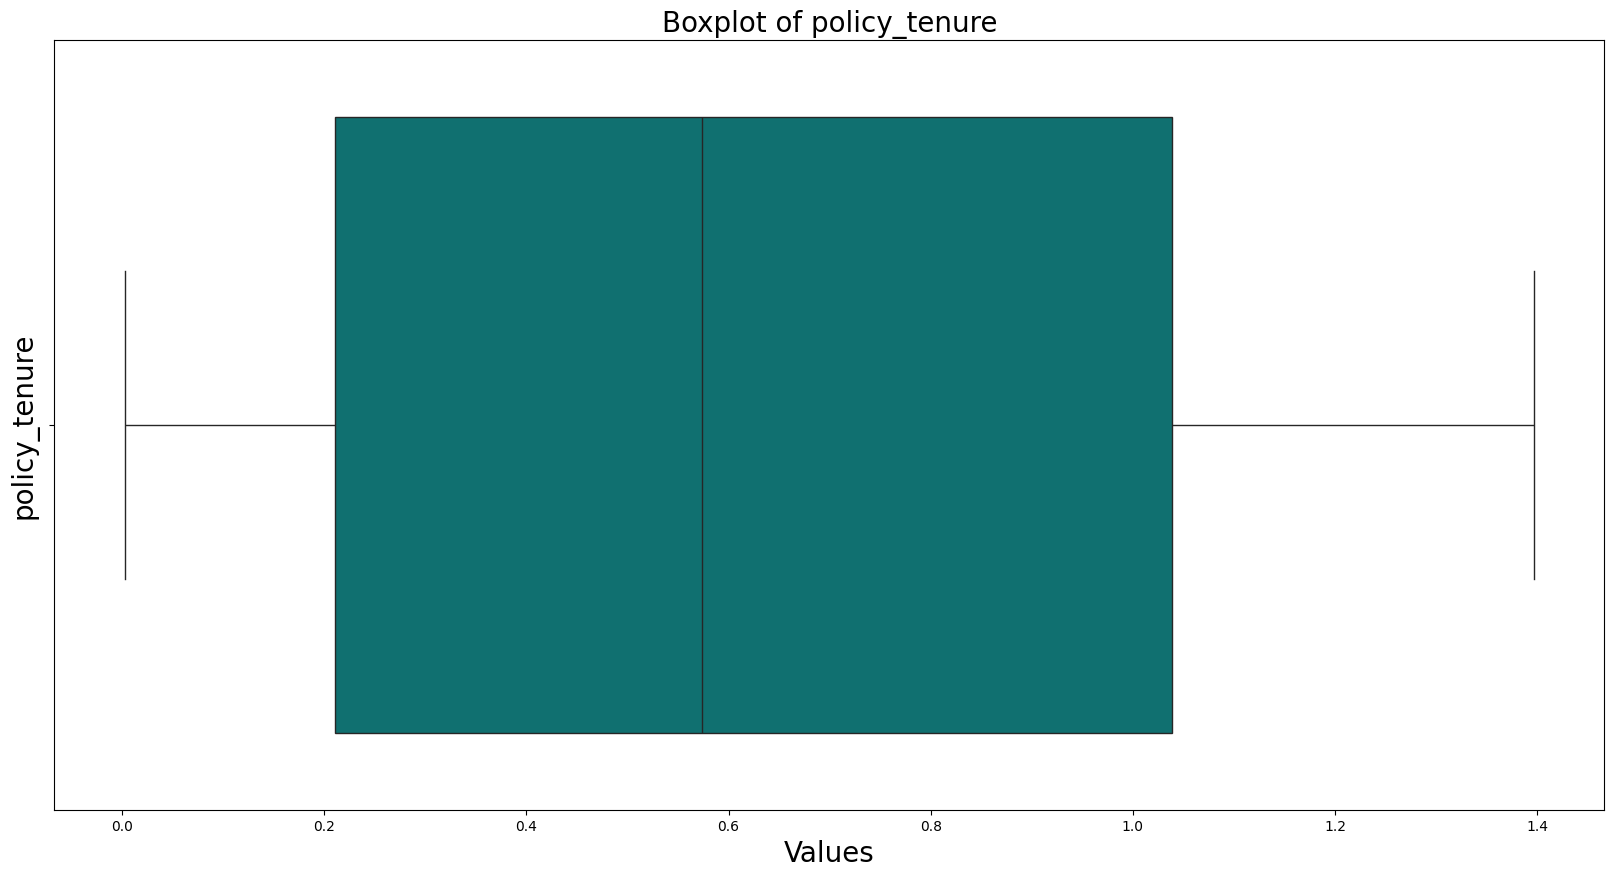

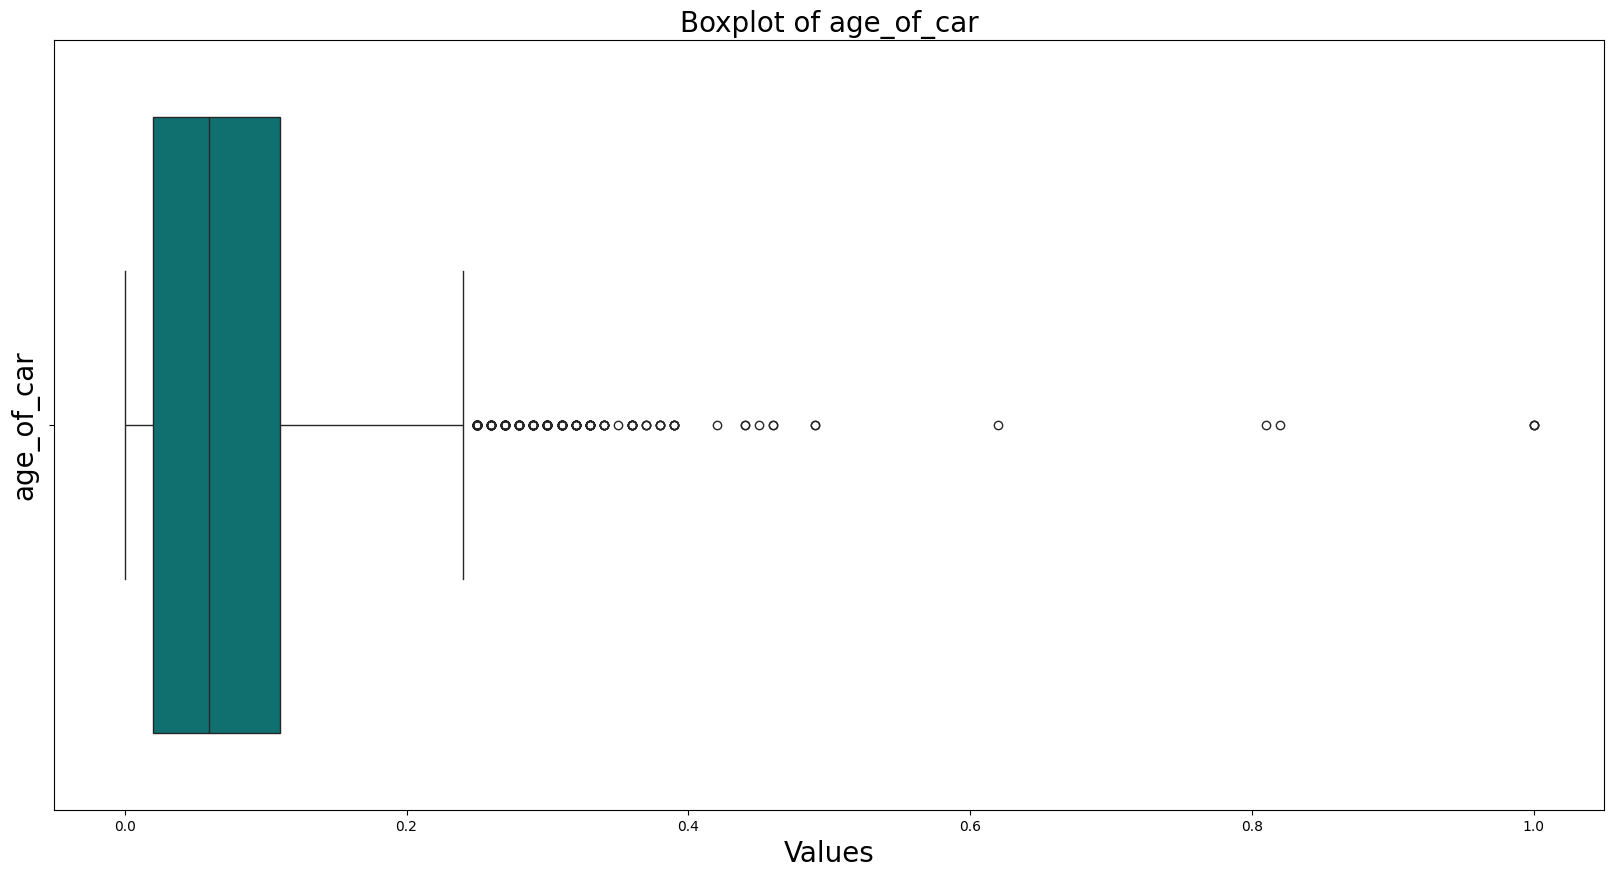

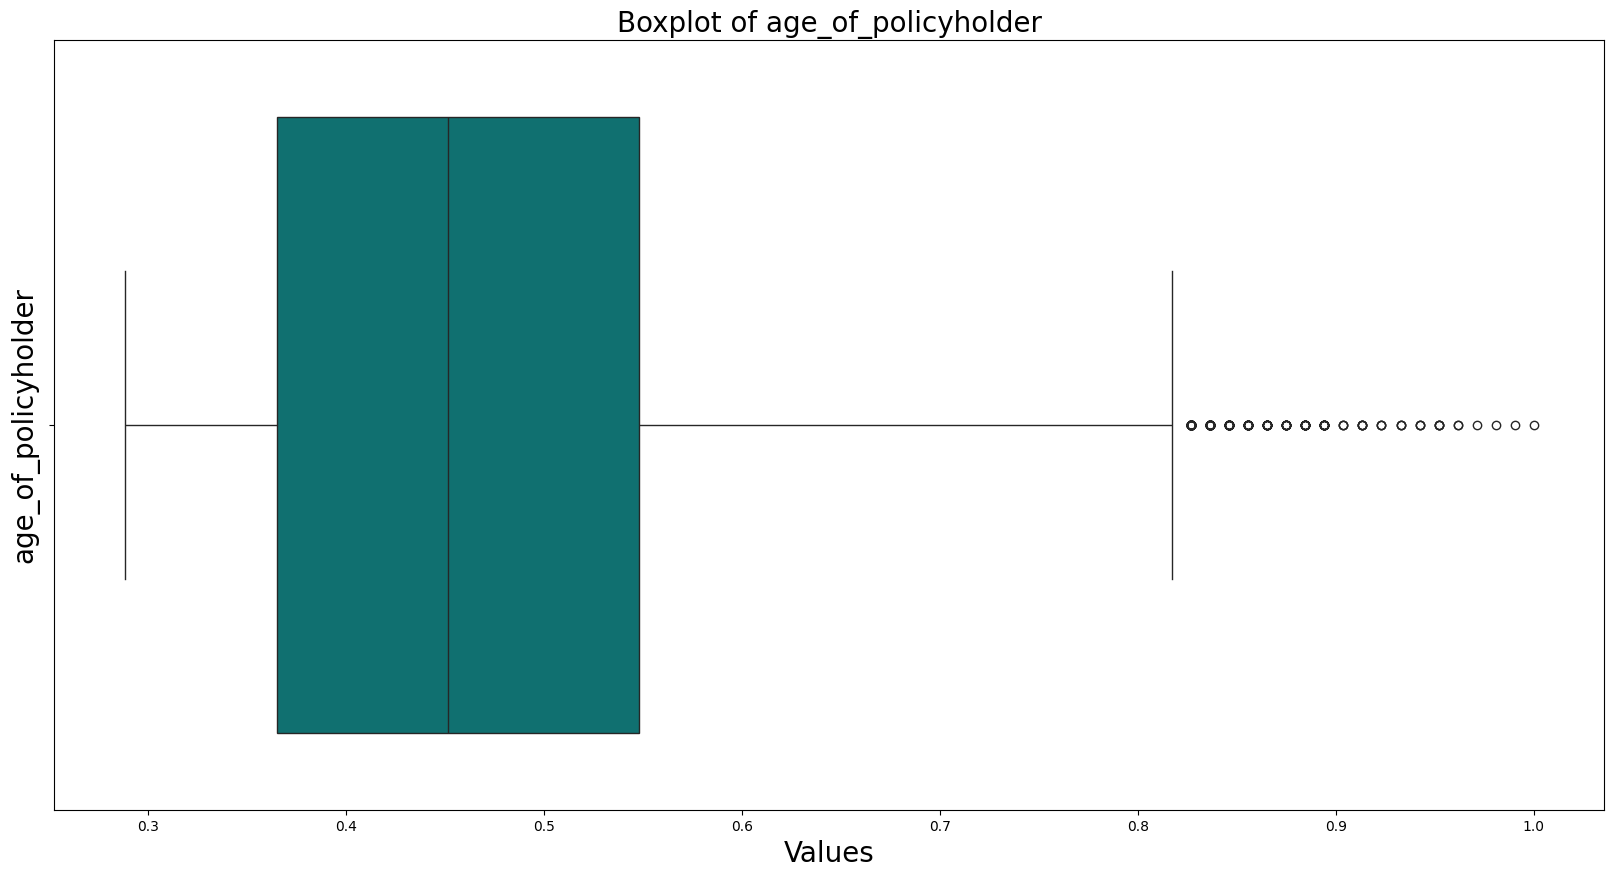

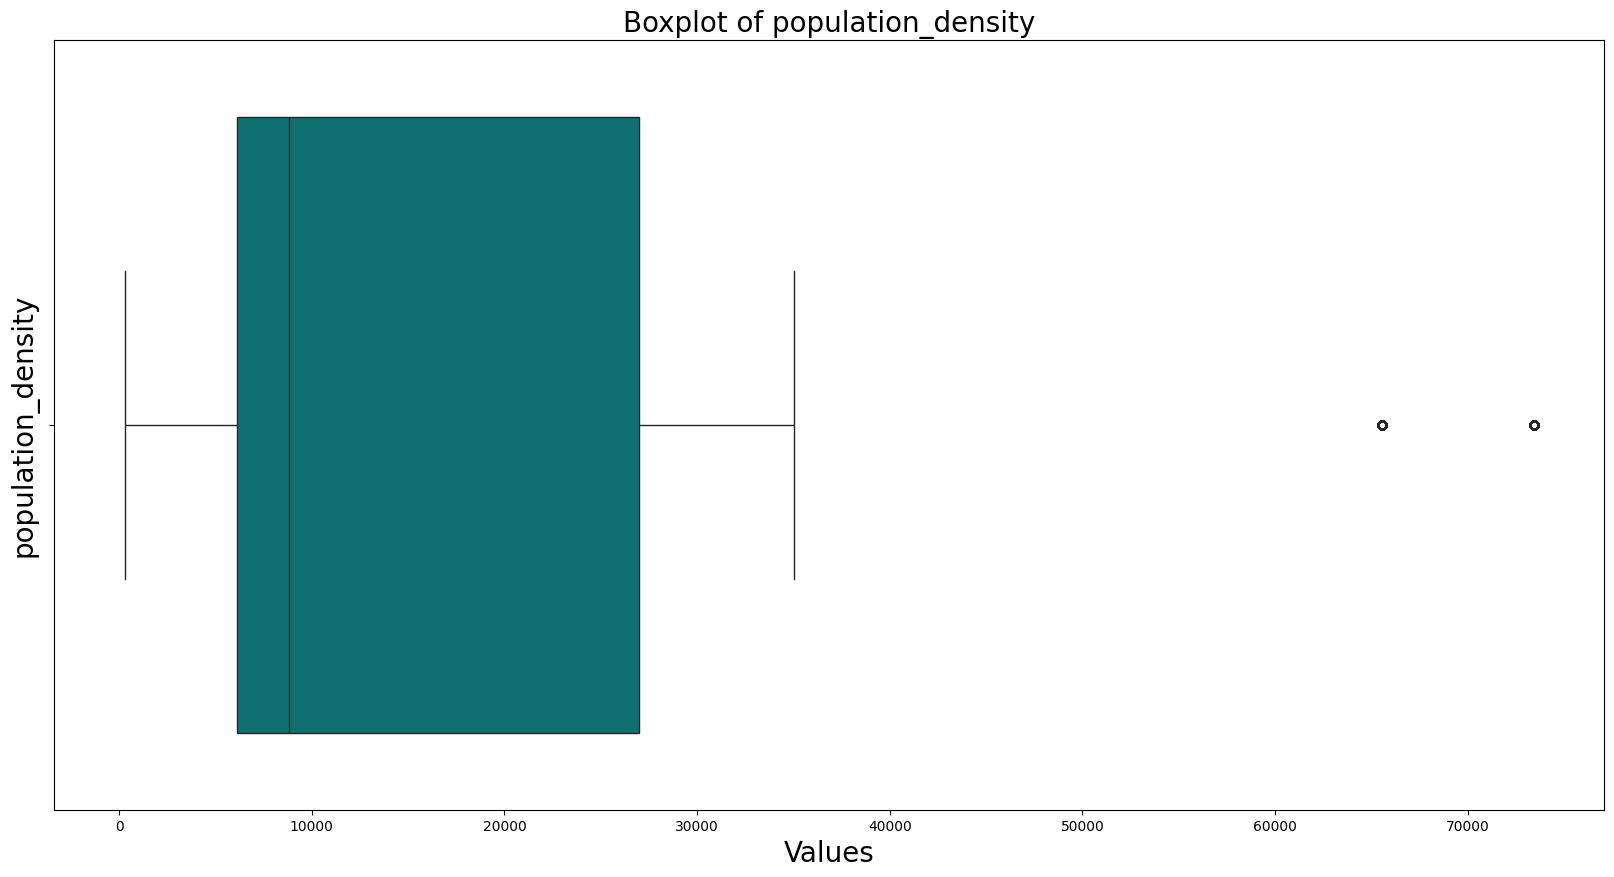

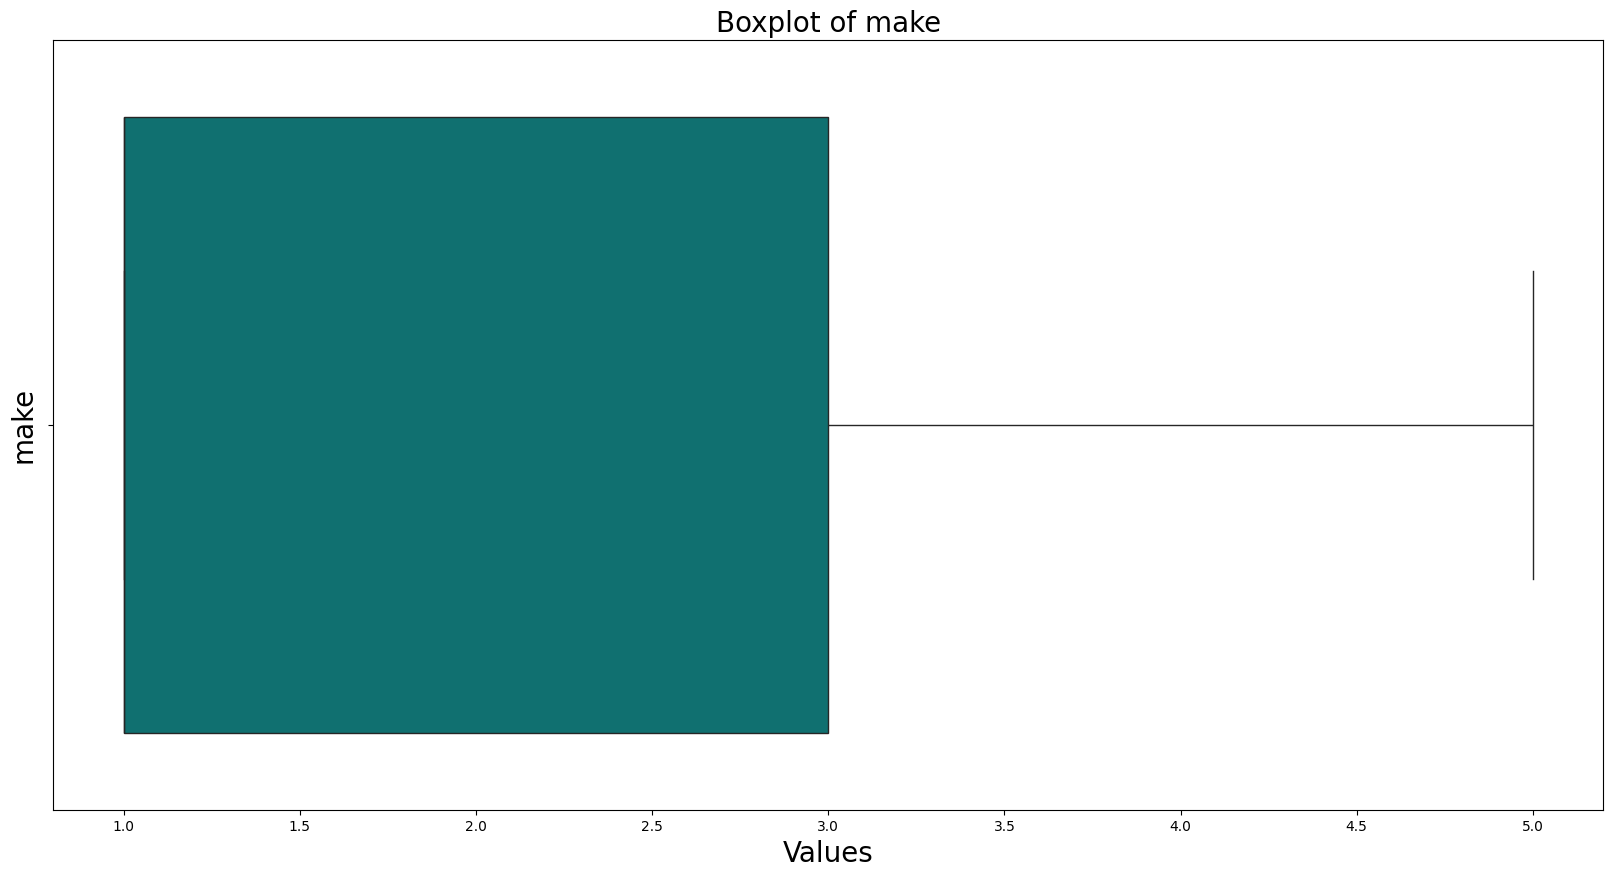

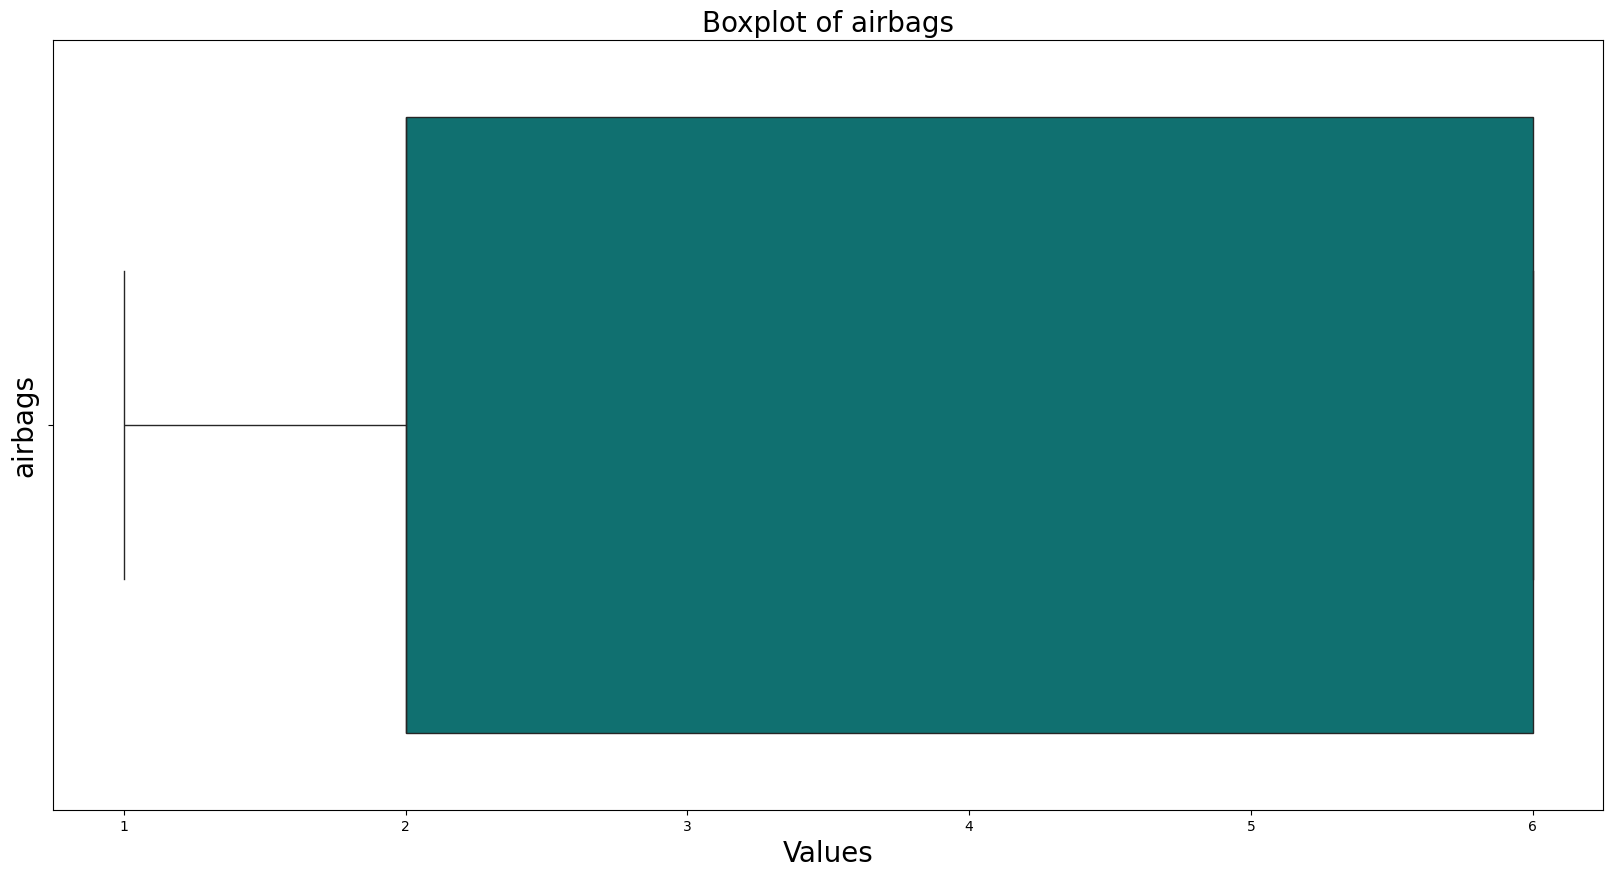

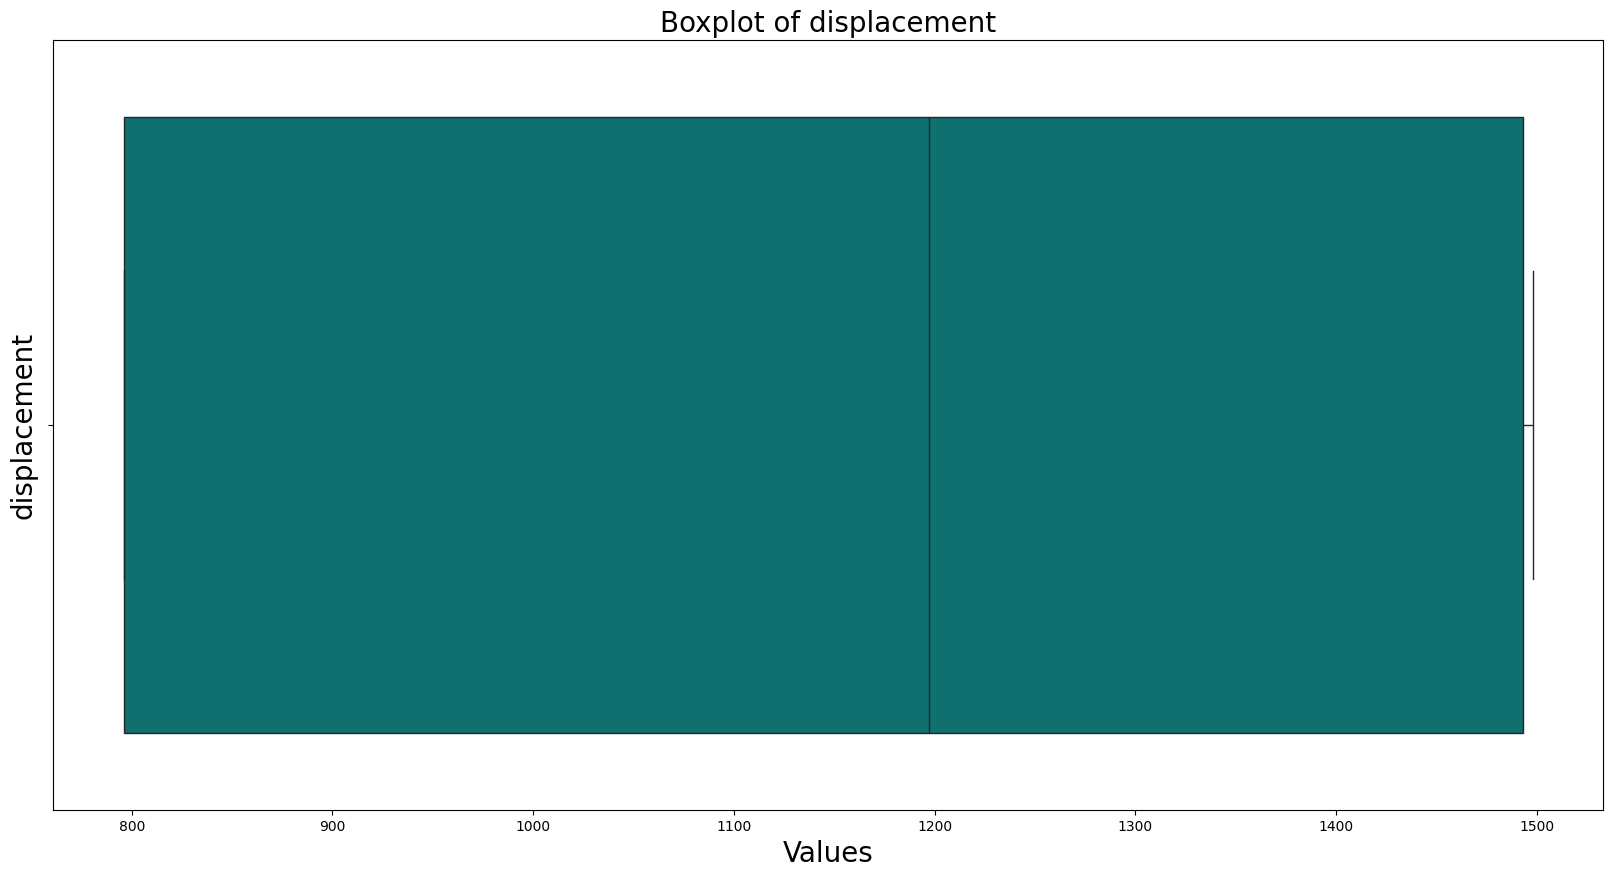

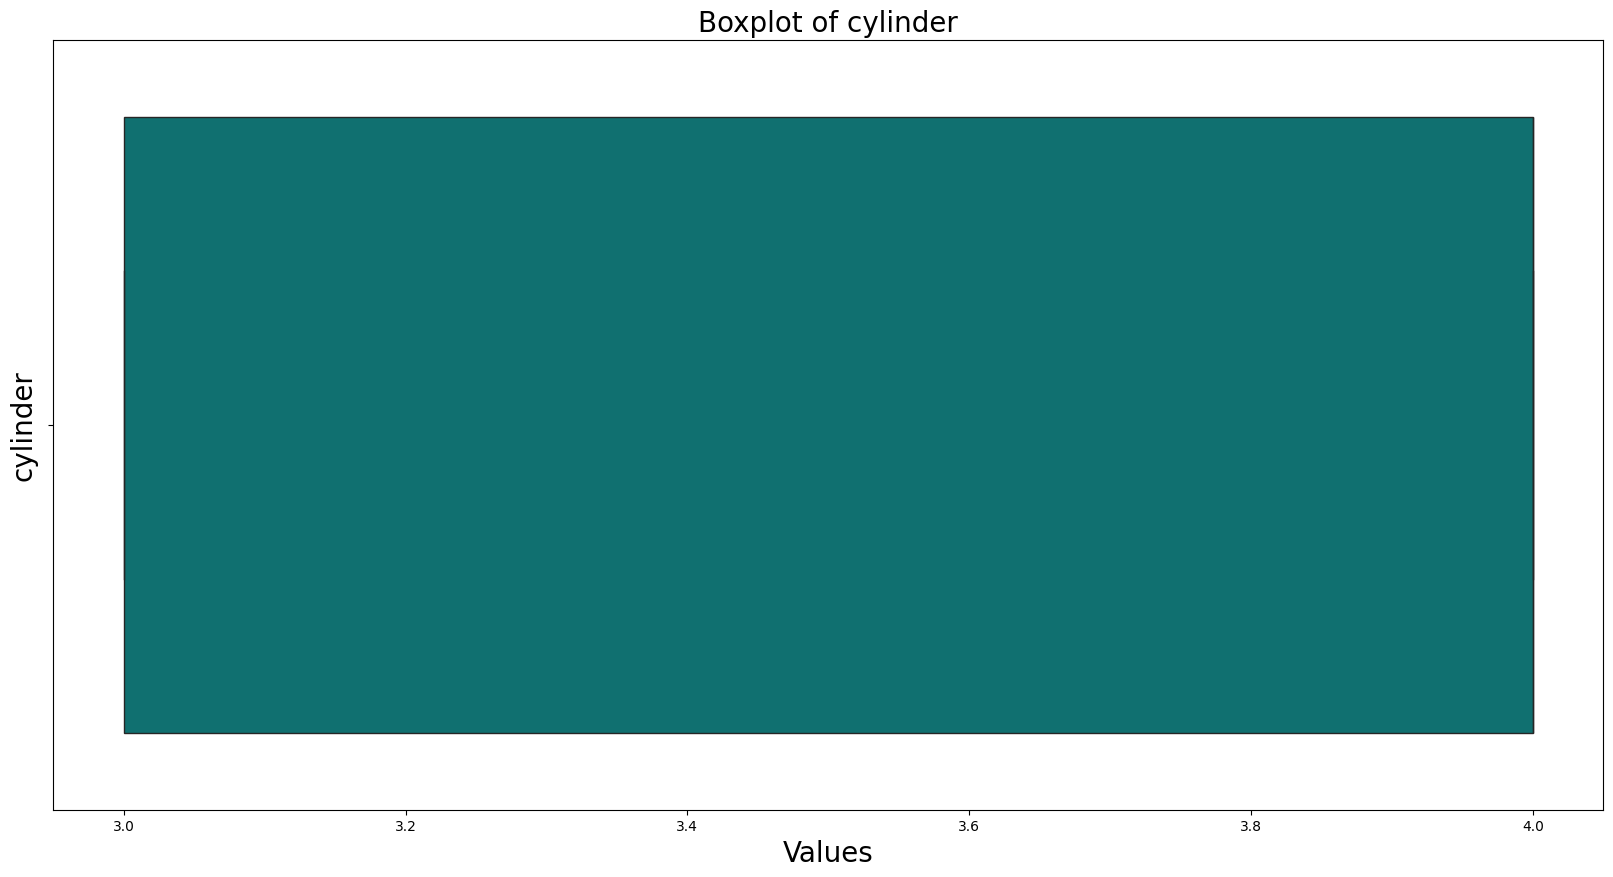

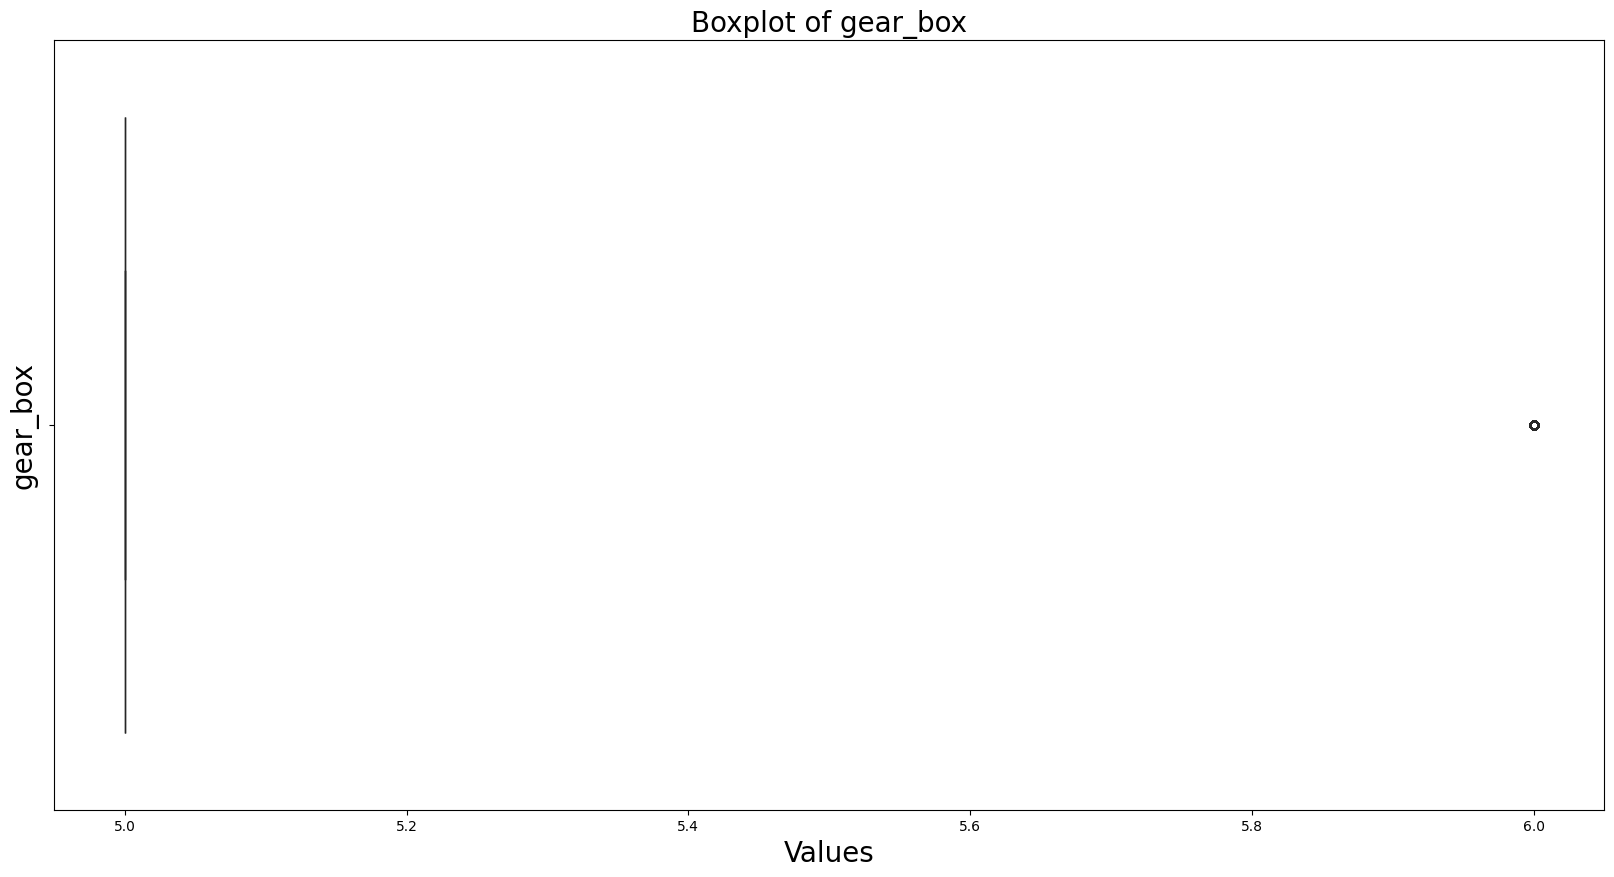

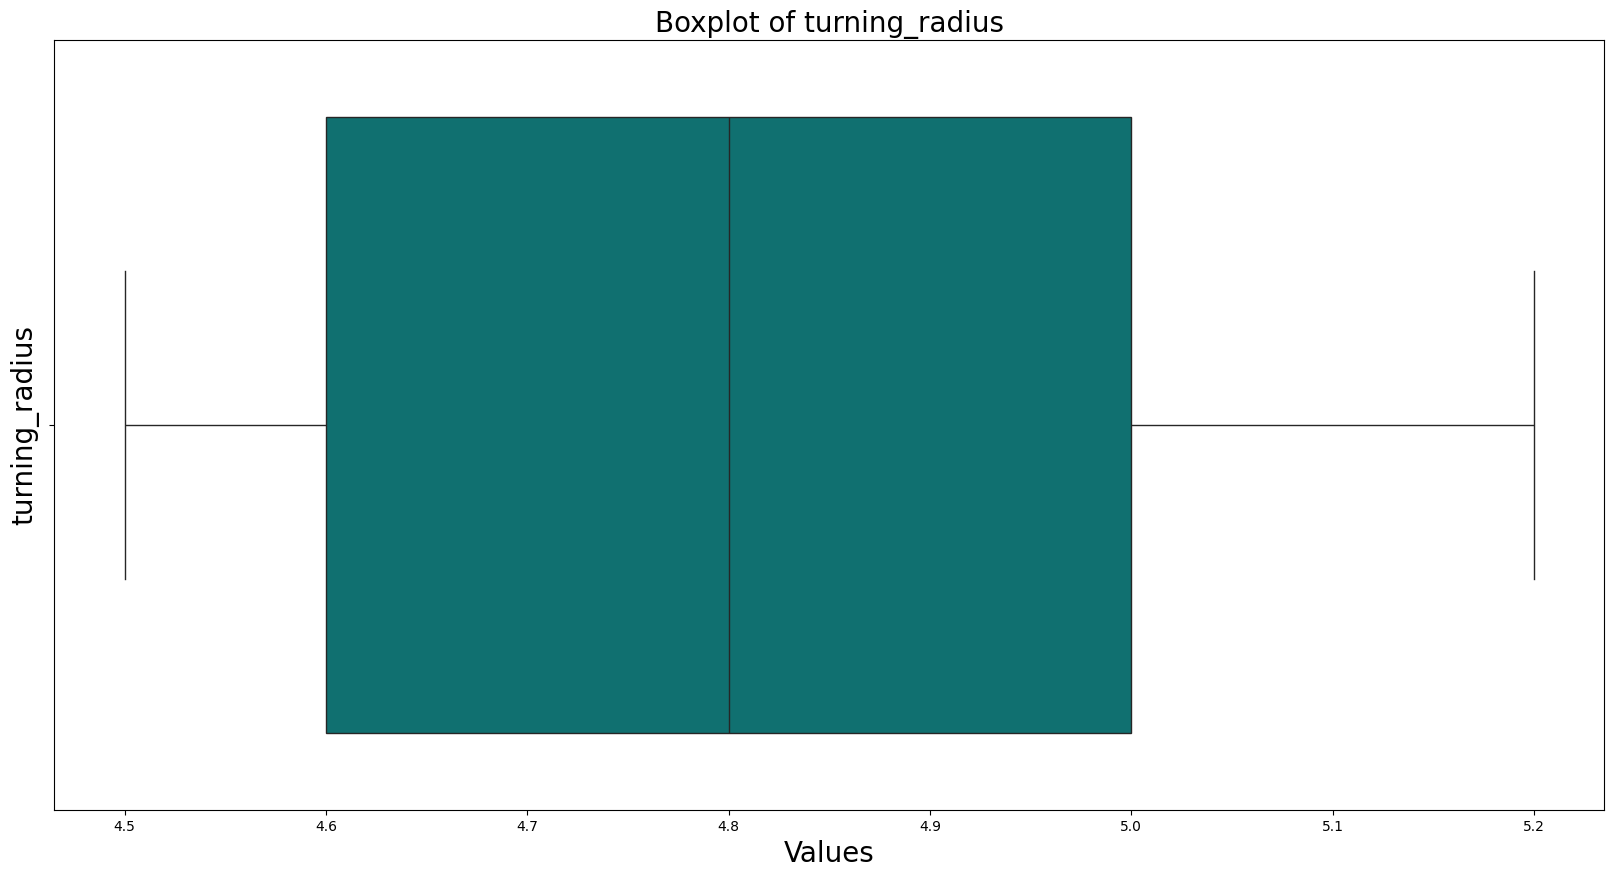

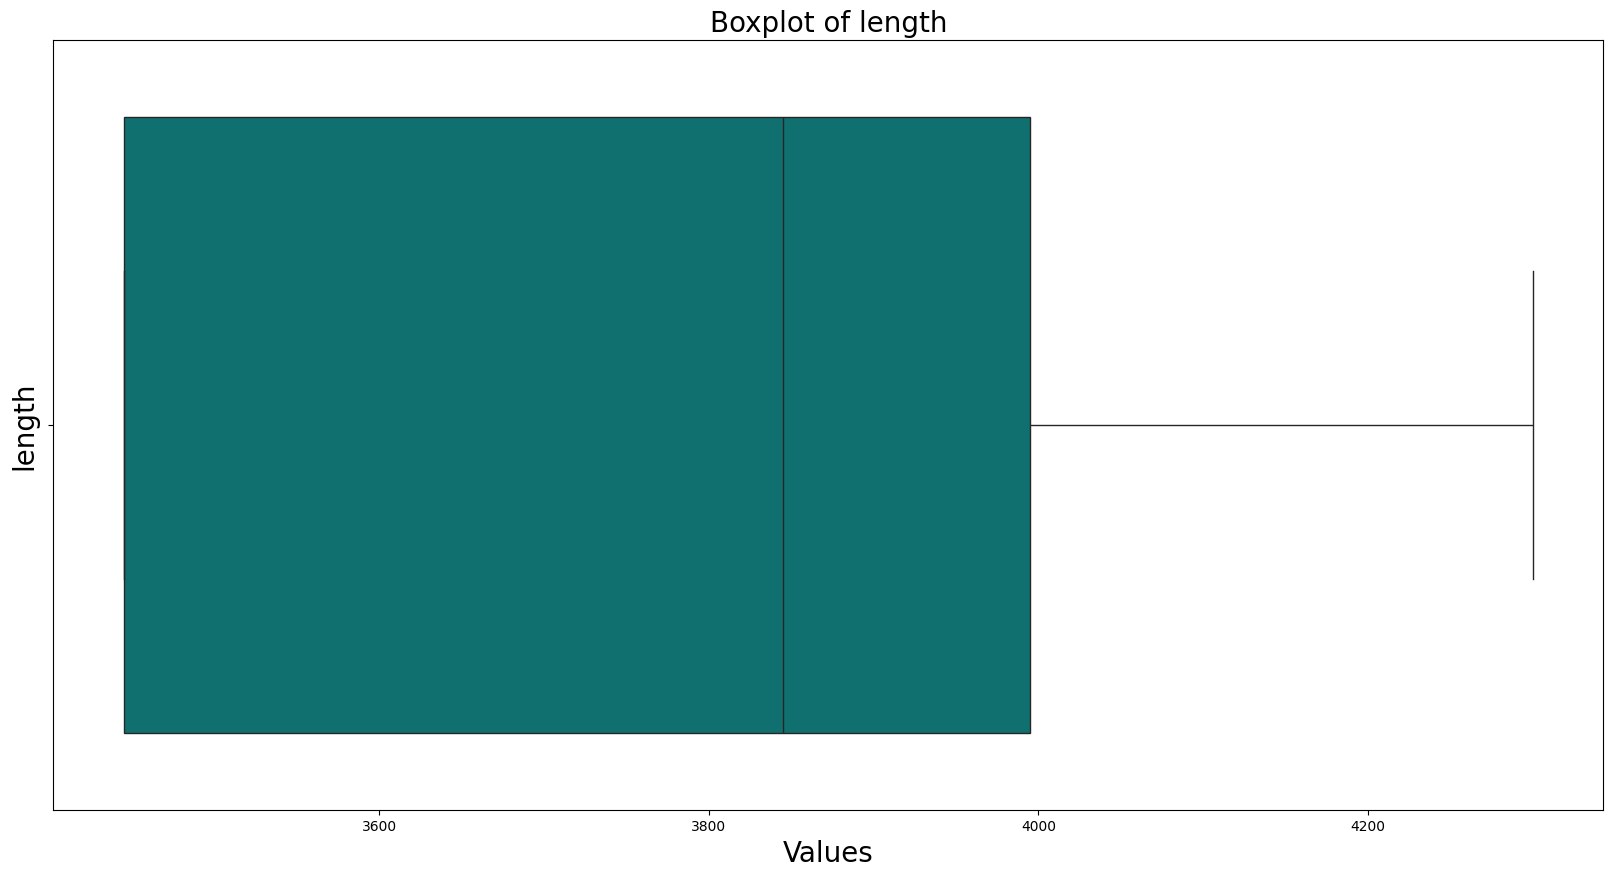

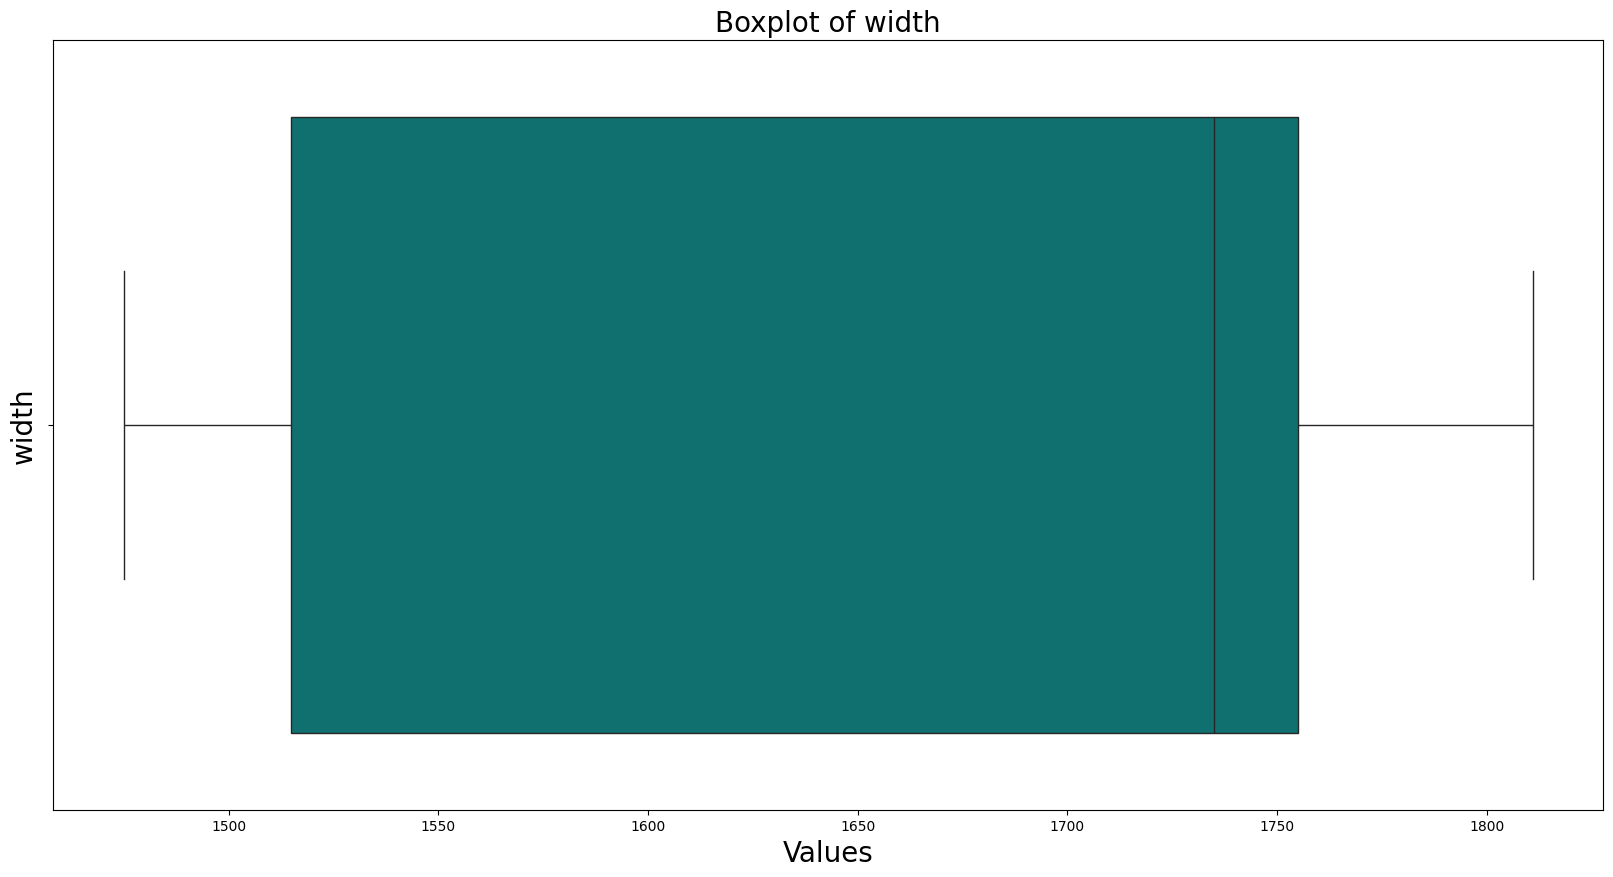

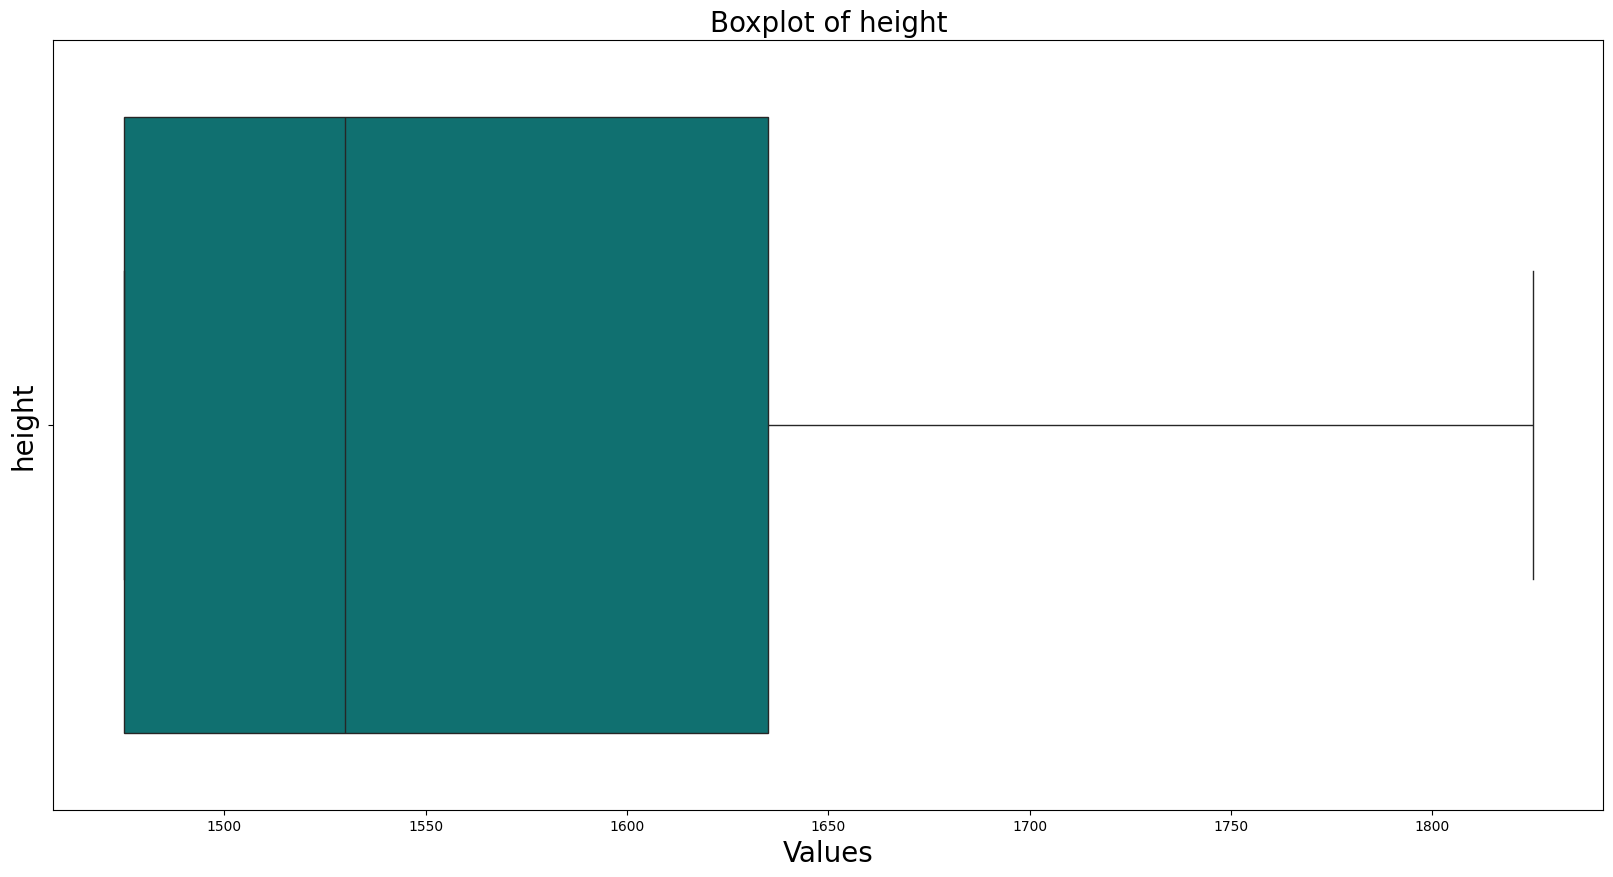

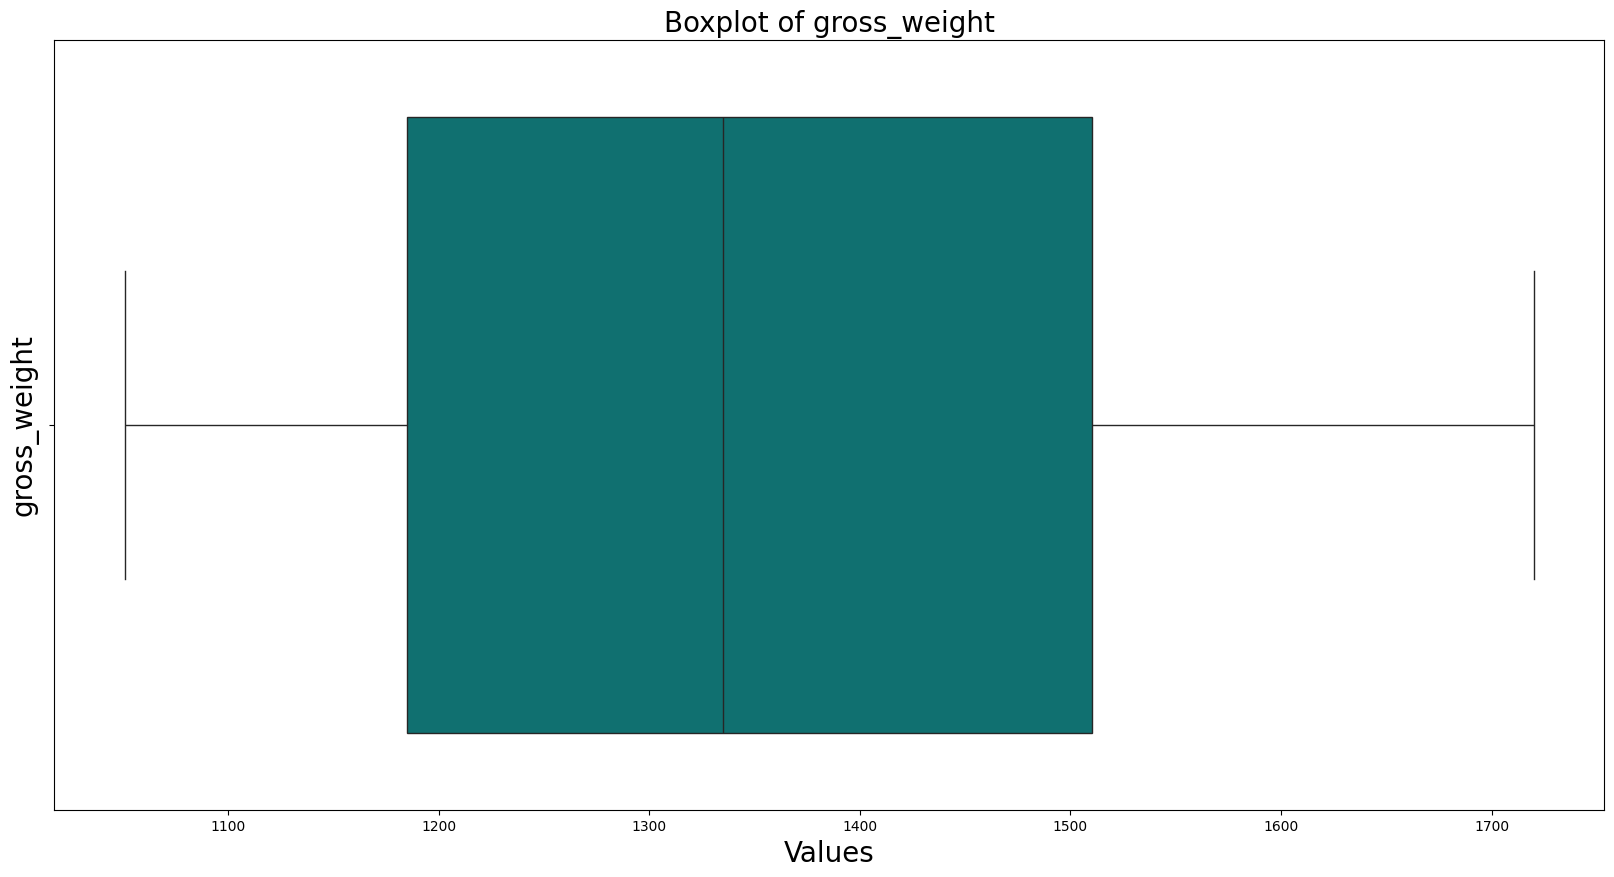

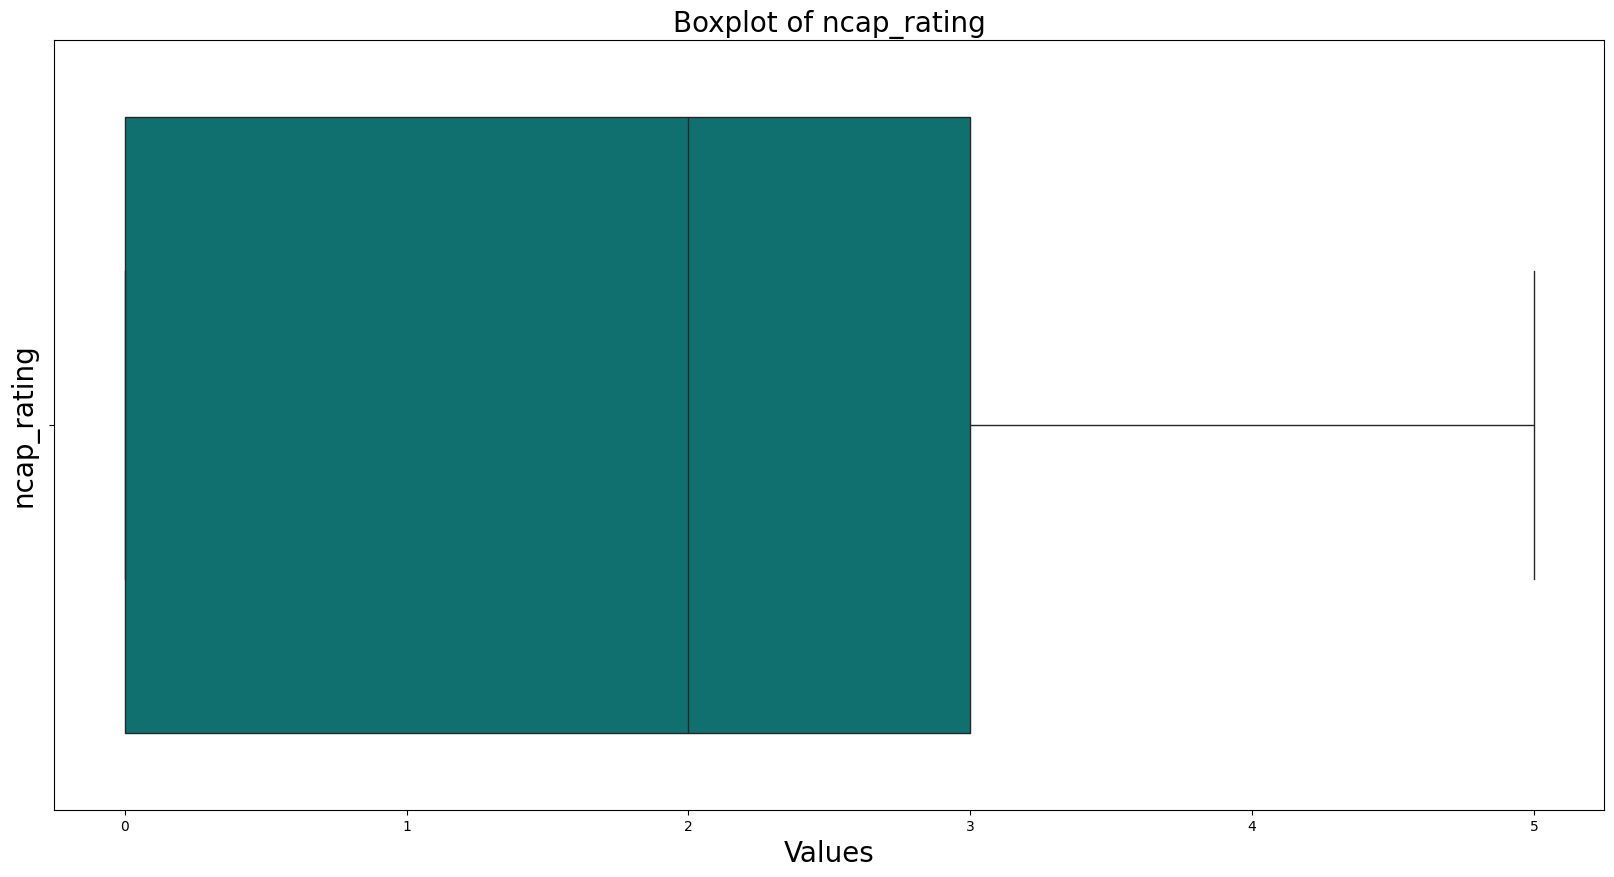

In [ ]:
# Plotting boxplots for all numerical columns in the DataFrame 'df' to identify outliers

# Iterate through each column in the DataFrame 'df'
for column in df.columns:
    # Check if the column is numerical (excluding columns starting with 'is')
    if df[column].dtype in ['int64', 'float64'] and not column.startswith('is'):
        # Create a boxplot for the current column
        plt.figure(figsize=(20, 10))  # Set the size of the boxplot
        sns.boxplot(x=df[column], color='teal')  # Plot the boxplot
        plt.title(f'Boxplot of {column}', fontsize=20)  # Set the title of the boxplot
        plt.xlabel('Values', fontsize=20)  # Set the label for the x-axis
        plt.ylabel(column, fontsize=20)  # Set the label for the y-axis
        plt.show()  # Display the boxplot


**Insights:**

Most people(7000) have policy active for 0.1 years

Majority people opt for insurance immediately when they purchase a car

Most policy holders are 0.3-0.4 yrs of age

Most people prefer 'make 1' car followed by 'make 3' and least preferred is '2' '4' and '5'

No. of airbags in most cars is '2'(40k+) while 2nd most popular choice is '6' (17k approx)

'1' airbag is present in almost 1000 cars while no car has '3' ,'4' or '5' airbags.

Most cars have ncap rating of '2' (20k+) followed by rating '0' (approx 19k)

Safer cars with rating '4' and '5' are least (<2.5k both)

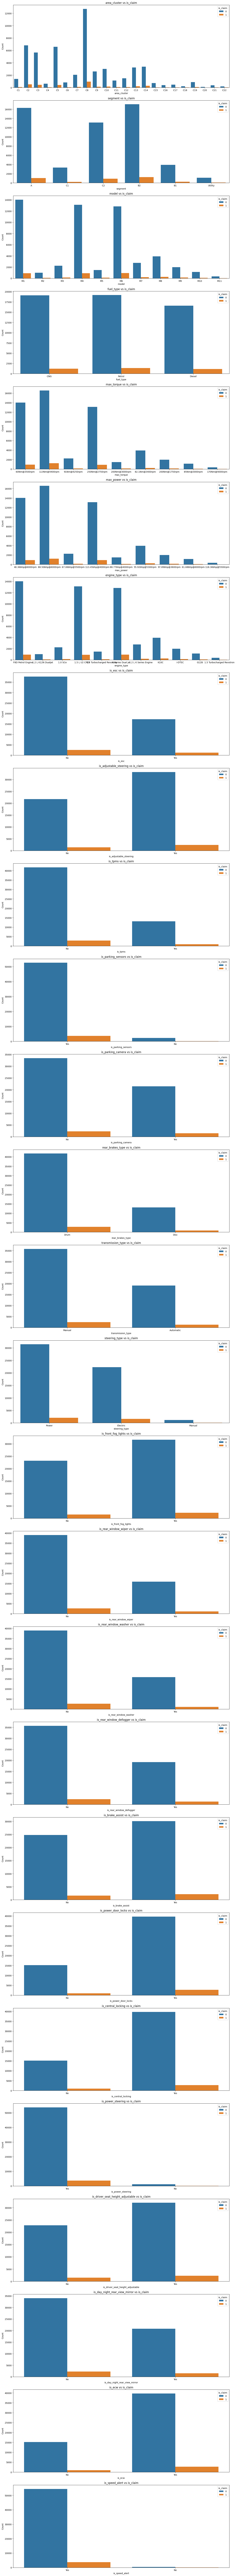

In [ ]:
# List of object columns
object_columns = df.select_dtypes(include='object').columns

# Set up subplots
num_cols = len(object_columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(15, num_cols * 6))

# Loop through each object column and create countplot
for i, col in enumerate(object_columns):
    sns.countplot(data=df, x=col, hue='is_claim', ax=axes[i])
    axes[i].set_title(f'{col} vs is_claim')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='is_claim', loc='upper right')

plt.tight_layout()
plt.show()


**Insights:**

Highest no. of claims(about 1000) come from area C8.

Owners with models M1 M4 and M6 have highest claims (about 1000 each).

There are zero claims where speed alert system isn't present in car.

In [ ]:
# Dealing with max_torque column
max_torque_counts = df['max_torque'].value_counts()
print(max_torque_counts)


113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64


In [ ]:
import re  # Importing the regular expression library

# Extracting the torque value from the 'max_torque' column using regular expressions and storing it in a new column 'torque'
df['torque'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=Nm)', x)[0])

# Extracting the RPM value from the 'max_torque' column using regular expressions and storing it in a new column 'rpm'
df['rpm'] = df['max_torque'].apply(lambda x: re.findall(r'\d+\.?\d*(?=rpm)', x)[0])

# Converting the 'torque' and 'rpm' columns to numeric data type
df['torque'] = pd.to_numeric(df['torque'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculating the ratio of torque to RPM and storing it in a new column 'torque to rpm ratio'
df['torque to rpm ratio'] = df['torque'] / df['rpm']

In [ ]:
# Deleting redundant columns from DataFrame df
df.drop(['max_torque', 'rpm', 'torque'], axis=1, inplace=True)


In [ ]:
df['max_power'].value_counts()

88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64

In [ ]:
# Extract power and RPM using regex
df['power'] = df['max_power'].apply(lambda x: re.findall(r'\d+\.?\d*(?=bhp)', x)[0])
df['rpm'] = df['max_power'].apply(lambda x: re.findall(r'\d+', x)[-1])

# Convert the columns to numeric data type
df['power'] = pd.to_numeric(df['power'])
df['rpm'] = pd.to_numeric(df['rpm'])

# Calculate power to RPM ratio
df['power to rpm ratio'] = df['power'] / df['rpm']


In [ ]:
# Deleting redundant columns
df.drop('power', axis=1,inplace=True)
df.drop('rpm',axis=1,inplace=True)
df.drop('max_power',axis=1,inplace=True)

In [ ]:
# Identify binary variables starting with "is" but excluding "is_claim"
is_cols = [col for col in df.columns if col.startswith("is") and col != "is_claim"]
is_cols




['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [ ]:
# Replace "No" with 0 and "Yes" with 1 for binary columns
df[is_cols] = df[is_cols].replace({"No": 0, "Yes": 1})

In [ ]:
df.dtypes

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
engine_type                          object
airbags                               int64
is_esc                                int64
is_adjustable_steering                int64
is_tpms                               int64
is_parking_sensors                    int64
is_parking_camera                     int64
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                              int64
steering_type                        object
turning_radius                  

In [ ]:
# Select object columns
object_cols = df.select_dtypes(include=['object']).columns

# Print the selected object columns
print(object_cols)


Index(['area_cluster', 'segment', 'model', 'fuel_type', 'engine_type',
       'rear_brakes_type', 'transmission_type', 'steering_type'],
      dtype='object')


In [ ]:
# Perform one-hot encoding for object columns with binary output (0 and 1)
df = pd.get_dummies(df, columns=object_cols, drop_first=True)

# Detailed comment:
# - One-hot encoding is performed for object columns with binary output (0 and 1).
# - The `pd.get_dummies()` function is used to create dummy variables for each category in the object columns.
# - The `columns` parameter specifies the object columns to encode.
# - `drop_first=True` is used to drop the first category in each column to avoid multicollinearity issues (dummy variable trap).
# - The `dtype=int` parameter ensures that the output dummy variables are of integer type (0 and 1) instead of boolean.


In [ ]:
# Calculate the correlation of all columns with the target variable 'is_claim', and sort them in descending order
correlation_with_target = df.corr()['is_claim'].abs().sort_values(ascending=False)

# Print the correlation values
print(correlation_with_target)

is_claim                    1.000000
policy_tenure               0.078747
age_of_car                  0.028172
age_of_policyholder         0.022435
population_density          0.017808
                              ...   
rear_brakes_type_Drum       0.000703
transmission_type_Manual    0.000637
gear_box                    0.000635
make                        0.000456
segment_C1                  0.000136
Name: is_claim, Length: 87, dtype: float64


**Insights:**




TOP 3 factors affecting claim are

1.Policy Tenure

2.Age of Car

3.Age of policy holder

In [ ]:
# Splitting the dataset into features and target
X = df.drop('is_claim', axis=1)  # Features
y = df[['is_claim']]  # Target variable


**Using SMOTEENN: A Combination Sampling Technique to handle Class Imabalance**

SMOTEENN stands for Synthetic Minority Over-sampling Technique (SMOTE) combined with Edited Nearest Neighbors (ENN). It is a popular technique used to address class imbalance in datasets. Here's how it works:

- **SMOTE (Synthetic Minority Over-sampling Technique):**
  - SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This helps to increase the representation of the minority class in the dataset.

- **ENN (Edited Nearest Neighbors):**
  - ENN is an undersampling technique that removes noisy and borderline samples from both the majority and minority classes. It focuses on removing samples that are misclassified by their nearest neighbors.

- **Combining SMOTE and ENN:**
  - SMOTEENN combines the strengths of SMOTE and ENN by first oversampling the minority class using SMOTE to increase its representation and then using ENN to clean up the dataset by removing noisy samples from both classes.


In [ ]:
#Balancing Target Class using SMOTEENN

from imblearn.combine import SMOTEENN


In [ ]:
smoteenn = SMOTEENN()
X_resampled, y_resampled = smoteenn.fit_resample(X, y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42) # 80% training and 20% test

**Logisitic Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# Initialize and fit a logistic regression model using scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate and print evaluation metrics for the model's performance
# - Accuracy
# - Precision
# - Recall
# - F1 Score
# These metrics are essential for assessing the classification model's effectiveness

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Evaluation Metrics:")
print("Accuracy - Training Set:", accuracy_train)
print("Accuracy - Test Set:", accuracy_test)
print()
print("Precision - Training Set:", precision_train)
print("Precision - Test Set:", precision_test)
print()
print("Recall - Training Set:", recall_train)
print("Recall - Test Set:", recall_test)
print()
print("F1 Score - Training Set:", f1_train)
print("F1 Score - Test Set:", f1_test)
print()

# Display confusion matrices for both the training and test sets
# The confusion matrix provides detailed insights into the model's performance
# by showing the counts of true positive, true negative, false positive, and false negative predictions
print("Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix - Test Set:")
print(confusion_matrix(y_test, y_test_pred))


Evaluation Metrics:
Accuracy - Training Set: 0.5621534820824882
Accuracy - Test Set: 0.5628127112914131

Precision - Training Set: 0.5613105496681456
Precision - Test Set: 0.5634827332843497

Recall - Training Set: 0.9393697646589549
Recall - Test Set: 0.9359287283378082

F1 Score - Training Set: 0.7027188321301918
F1 Score - Test Set: 0.7034489084571638

Confusion Matrix - Training Set:
[[ 2642 23927]
 [ 1976 30615]]
Confusion Matrix - Test Set:
[[ 655 5941]
 [ 525 7669]]


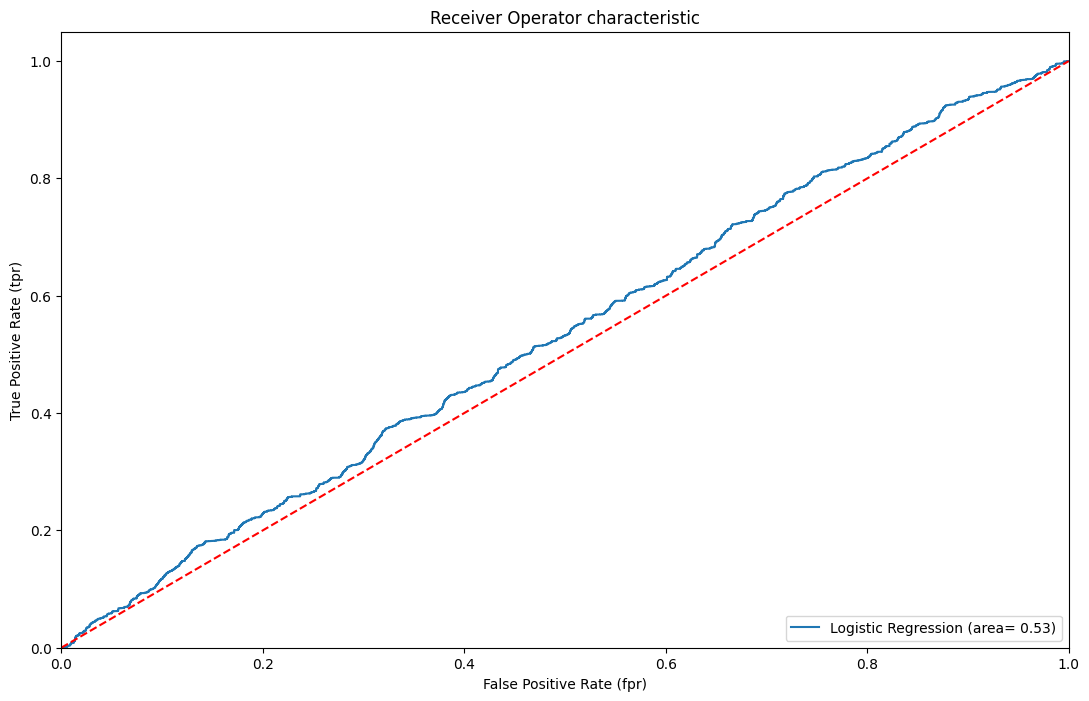

In [ ]:
# Plot ROC_AUC_Curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Find out how likely each training data point is to belong to the positive category.

This helps us understand the confidence level of our model's predictions and make better decisions.

In [ ]:
# Predict probabilities on the training set
train_pred_prob = log_reg.predict_proba(X_train)[:, 1]


In [ ]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.is_claim == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.is_claim == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.is_claim == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.is_claim == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)


In [ ]:
# Sensitivity (Sn)
cutoff_data['Sn'] = cutoff_data["TP"] / cutoff_data["P"]

# Specificity (Sp)
cutoff_data['Sp'] = cutoff_data["TN"] / cutoff_data["N"]

# Distance
cutoff_data['Dist'] = ((1 - cutoff_data["Sn"])**2 + (1 - cutoff_data["Sp"])**2)**0.5

# Kolmogorov-Smirnov (KS)
cutoff_data['KS'] = ((cutoff_data["TP"] / cutoff_data["P"]) - (cutoff_data["FP"] / cutoff_data["N"])).abs()

# Recall (Re)
cutoff_data['Re'] = cutoff_data["TP"] / cutoff_data["P"]

# Precision (Pr)
cutoff_data['Pr'] = cutoff_data["TP"] / (cutoff_data["TP"] + cutoff_data["FP"])

# True Positive Rate (tpr)
cutoff_data['tpr'] = cutoff_data["Re"]

# False Positive Rate (fpr)
cutoff_data['fpr'] = 1 - cutoff_data["Sp"]

# F1 Score
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"]) / (cutoff_data["Pr"] + cutoff_data["Re"])


In [ ]:
cutoff_data.head()

,Cutoff_Prob,TP,FN,TN,FP,P,N
0,0.00,32591.0,0.0,0.0,26569.0,32591.0,26569.0
1,0.01,32591.0,0.0,0.0,26569.0,32591.0,26569.0
2,0.02,32591.0,0.0,0.0,26569.0,32591.0,26569.0
3,0.03,32591.0,0.0,0.0,26569.0,32591.0,26569.0
4,0.04,32591.0,0.0,0.0,26569.0,32591.0,26569.0


**We will be calculating the following cutoffs :-**

1.dist_cutoff: Finds the cutoff probability value based on the minimum distance calculated in the cutoff_data DataFrame. It selects the row with the smallest distance and retrieves the corresponding cutoff probability value.

2.ks_cutoff: Determines the cutoff probability value based on the maximum Kolmogorov-Smirnov (KS) statistic calculated in the cutoff_data DataFrame. It selects the row with the largest KS statistic and retrieves the corresponding cutoff probability value.

3.f1_cutoff: Calculates the cutoff probability value based on the maximum F1 score calculated in the cutoff_data DataFrame. It selects the row with the highest F1 score and retrieves the corresponding cutoff probability value.


In [ ]:
# Cutoff probability value based on minimum distance
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum Kolmogorov-Smirnov (KS) statistic
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum F1 score
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]


In [ ]:
print("The dist cutoff determined is:", dist_cutoff)
print("The KS cutoff determined is:", ks_cutoff)
print("The f1 cutoff determined is:", f1_cutoff)


The dist cutoff determined is: 0.56
The KS cutoff determined is: 0.54
The f1 cutoff determined is: 0.39


In [ ]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:,1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")


Using the cutoff value as: 0.56
Accuracy on train data: 0.5168356997971603
Accuracy on test data: 0.5089249492900608
Recall on train data: 0.46043386210917125
Recall on test data: 0.4474005369782768
Precision on train data: 0.5770428763699289
Precision on test data: 0.5727230120293704
f1 score on train data: 0.5121851320909278
f1 score on test data: 0.5023638232271326


Using the cutoff value as: 0.54
Accuracy on train data: 0.5497295469912102
Accuracy on test data: 0.545841784989858
Recall on train data: 0.7348961369703292
Recall on test data: 0.7252867952160117
Precision on train data: 0.570955207513886
Precision on test data: 0.5709482178883658
f1 score on train data: 0.6426348269385566
f1 score on test data: 0.6389292049669408


Using the cutoff value as: 0.39
Accuracy on train data: 0.5515889114266396
Accuracy on test data: 0.5546315077755241
Recall on train data: 1.0
Recall on test data: 1.0
Precision on train data: 0.551277930952824
Precision on test data: 0.5543603274473987
f1 

In [ ]:
default=0.5

In [ ]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.562153,0.562813,0.939370,0.935929,0.561311,0.563483,0.702719,0.703449
1,0.56,0.516836,0.508925,0.460434,0.447401,0.577043,0.572723,0.512185,0.502364
2,0.54,0.549730,0.545842,0.734896,0.725287,0.570955,0.570948,0.642635,0.638929
3,0.39,0.551589,0.554632,1.000000,1.000000,0.551278,0.554360,0.710740,0.713297


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9217038539553752
Precision: 0.92590799031477
Recall: 0.9333658774713205
F1 Score: 0.9296219764191078


**Decision Tree Classifier with Pre-Pruning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the tree
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_dt_classifier.predict(X_train)
y_test_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'gini'}
Training Metrics:
Accuracy: 0.6538201487491548
Precision: 0.631176483330806
Recall: 0.8940198214230922
F1 Score: 0.7399497168397795

Test Metrics:
Accuracy: 0.6505070993914808
Precision: 0.6303317535545023
Recall: 0.8927263851598731
F1 Score: 0.7389262083943633


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 7, 15],  # Number of trees in the forest
    'max_depth': np.arange(1, 10),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 15, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'max_depth': 9}
Training Metrics:
Accuracy: 0.7382014874915483
Precision: 0.707747248742803
Recall: 0.8938970881531711
F1 Score: 0.7900046099194621

Test Metrics:
Accuracy: 0.7345503718728871
Precision: 0.7067028283611003
Recall: 0.8904076153282889
F1 Score: 0.7879900637217843


**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Initialize base estimator (Decision Tree)
base_estimator = DecisionTreeClassifier(random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 1.0],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 1.0]  # Maximum number of features to consider when looking for the best split
}


# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(X_train)
y_test_pred = best_bagging_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 10, 'max_samples': 1.0, 'max_features': 1.0}
Training Metrics:
Accuracy: 0.9946416497633536
Precision: 0.9995047359623599
Recall: 0.990764321438434
F1 Score: 0.9951153366103209

Test Metrics:
Accuracy: 0.9453008789722785
Precision: 0.97224709042077
Recall: 0.927752013668538
F1 Score: 0.9494785486791981


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(10, 50, 5),  # Number of boosting stages to be used in the boosting process
    'learning_rate': [1, 0.1, 0.5, 0.01]  # Weight applied to each classifier at each boosting iteration
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_ab_tuned.predict(X_train)
y_test_pred = best_ab_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 35, 'learning_rate': 0.01}
Training Metrics:
Accuracy: 0.6410243407707911
Precision: 0.6333756225918616
Recall: 0.8271915559510294
F1 Score: 0.7174239904197991

Test Metrics:
Accuracy: 0.6413793103448275
Precision: 0.6351730589335828
Recall: 0.8286551134976813
F1 Score: 0.7191273035373862


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from

parameter_grid = {
    'n_estimators': [20, 30, 40],  # Number of boosting stages to be used in the boosting process
    'learning_rate': [0.1, 0.3, 0.5],  # Weight applied to each classifier at each boosting iteration
    'max_depth': [3, 4, 5],  # Maximum depth of each tree in the ensemble
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(X_train)
y_test_pred = best_gb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 40, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.3}
Training Metrics:
Accuracy: 0.9211629479377959
Precision: 0.9257919013877692
Recall: 0.8849989260838882
F1 Score: 0.925196471531676

Test Metrics:
Accuracy: 0.9114266396213658
Precision: 0.9164548881856487
Recall: 0.8751525506468147
F1 Score: 0.9163046256069511


**XG Boost Classifier**

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [50, 75, 100],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}


# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_xgb_tuned.predict(X_train)
y_test_pred = best_xgb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')  # Changed to 'weighted'
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Changed to 'weighted'
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'gamma': 0, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7}
Training Metrics:
Accuracy: 0.937001352265044
Precision: 0.9401162928369833
Recall: 0.9077045810192998
F1 Score: 0.9407406229628099

Test Metrics:
Accuracy: 0.9209601081812036
Precision: 0.9244370915732778
Recall: 0.8919941420551624
F1 Score: 0.925951732438082


In [ ]:
import pandas as pd

# Define the metrics and their corresponding values for each classifier
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
classifiers = ['Logistic Regression', 'Decision Tree', 'Decision Tree with Pre-Pruning',
               'Random Forest', 'Bagging', 'AdaBoost', 'Gradient Boost', 'XG Boost']

train_values = [[0.5621534820824882, 0.5613105496681456, 0.9393697646589549, 0.7027188321301918],
                [1.0, 1.0, 1.0, 1.0],
                [0.6538201487491548, 0.631176483330806, 0.8940198214230922, 0.7399497168397795],
                [0.7382014874915483, 0.707747248742803, 0.8938970881531711, 0.7900046099194621],
                [0.9946416497633536, 0.9995047359623599, 0.990764321438434, 0.9951153366103209],
                [0.6410243407707911, 0.6333756225918616, 0.8271915559510294, 0.7174239904197991],
                [0.9211629479377959, 0.9257919013877692, 0.8849989260838882, 0.925196471531676],
                [0.937001352265044, 0.9401162928369833, 0.9077045810192998, 0.9407406229628099]]

test_values = [[0.5628127112914131, 0.5634827332843497, 0.9359287283378082, 0.7034489084571638],
               [0.9217038539553752, 0.92590799031477, 0.9333658774713205, 0.9296219764191078],
               [0.6505070993914808, 0.6303317535545023, 0.8927263851598731, 0.7389262083943633],
               [0.7345503718728871, 0.7067028283611003, 0.8904076153282889, 0.7879900637217843],
               [0.9453008789722785, 0.97224709042077, 0.927752013668538, 0.9494785486791981],
               [0.6413793103448275, 0.6351730589335828, 0.8286551134976813, 0.7191273035373862],
               [0.9114266396213658, 0.9164548881856487, 0.8751525506468147, 0.9163046256069511],
               [0.9209601081812036, 0.9244370915732778, 0.8919941420551624, 0.925951732438082]]

# Create DataFrames for the training and test metrics
train_df = pd.DataFrame(train_values, columns=metrics, index=classifiers)
test_df = pd.DataFrame(test_values, columns=metrics, index=classifiers)

# Merge training and test DataFrames for each metric
merged_df = pd.concat([train_df, test_df], axis=1, keys=['Training Set', 'Test Set'], names=['Data', 'Metric'])

# Display the summary table
merged_df


Data                           Training Set                                \
Metric                             Accuracy Precision    Recall  F1 Score   
Logistic Regression                0.562153  0.561311  0.939370  0.702719   
Decision Tree                      1.000000  1.000000  1.000000  1.000000   
Decision Tree with Pre-Pruning     0.653820  0.631176  0.894020  0.739950   
Random Forest                      0.738201  0.707747  0.893897  0.790005   
Bagging                            0.994642  0.999505  0.990764  0.995115   
AdaBoost                           0.641024  0.633376  0.827192  0.717424   
Gradient Boost                     0.921163  0.925792  0.884999  0.925196   
XG Boost                           0.937001  0.940116  0.907705  0.940741   

Data                            Test Set                                
Metric                          Accuracy Precision    Recall  F1 Score  
Logistic Regression             0.562813  0.563483  0.935929  0.703449  
Decision Tree                   0.921704  0.925908  0.933366  0.929622  
Decision Tree with Pre-Pruning  0.650507  0.630332  0.892726  0.738926  
Random Forest                   0.734550  0.706703  0.890408  0.787990  
Bagging                         0.945301  0.972247  0.927752  0.949479  
AdaBoost                        0.641379  0.635173  0.828655  0.719127  
Gradient Boost                  0.911427  0.916455  0.875153  0.916305  
XG Boost                        0.920960  0.924437  0.891994  0.925952

Based on the evaluation of various classification algorithms, XG Boost stands out as the most promising model. It demonstrates strong performance across multiple metrics on both the training and test sets. Specifically, in terms of accuracy, precision, recall, and F1 score, XG Boost consistently achieves high scores, outperforming other classifiers.

**Business Conclusion**

Policy Tenure: The duration of the policyholder's relationship with the insurer may influence claim frequency.

Age of Car: The age of the insured vehicle is a significant factor affecting the likelihood of claims.

Age of Policyholder: Policyholders at different stages of life may demonstrate varying patterns in claim behavio